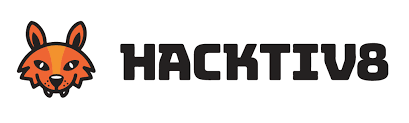

# FINAL PROJECT 4

**Kelompok 3 - PYTN-KS11**
1. M. Haikal Febrian
2. Naurah Nadzifah Azizi
3. Nadia Syachrani
4. Muhammad Randy

## Introduction

### Background
Penggunaan kartu kredit telah menjadi metode pembayaran yang umum digunakan di era digital saat ini.  Bagi perusahaan kartu kredit dan lembaga keuangan, memahami pola penggunaan kartu kredit oleh pelanggan mereka sangat penting. Itu membantu mereka dalam mengidentifikasi kebiasaan pengeluaran, perilaku pembayaran, dan pola penggunaan yang dapat membantu mereka dalam mengambil keputusan bisnis yang lebih baik.

Dengan memanfaatkan dataset ini, perusahaan kartu kredit dan lembaga keuangan dapat meningkatkan pemahaman tentang perilaku pengguna kartu kredit, mengoptimalkan strategi bisnis, dan meningkatkan kepuasan pelanggan.

### Data Used
Analisis ini menggunakan dataset yang bersumber dari Kaggle dengan judul ["Credit Card Dataset for Clustering"](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut.

### Objective
* Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
* Mampu mempersiapkan data untuk digunakan dalam Clustering
* Mampu mengimplementasikan Clustering pada data yang diberikan

## Import Library
Melakukan import libraries yang digunakan dalam project ini

In [1]:
#untuk data prepocessing
import pandas as pd
import numpy as np

#untuk visualisasi
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#untuk mengisi nilai NaN
import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno

#untuk menangani outliers
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor

#untuk encoding data categorical
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

#untuk clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#untuk mengabaikan peringatan
import warnings
warnings.filterwarnings('ignore')

print('Libraries sudah siap')

Libraries sudah siap


## Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana

In [2]:
# Melakukan loading dataset menggunakan library Pandas
df = pd.read_csv('CC GENERAL.csv')

In [3]:
# Melakukan pengaturan yakni tidak memberi batasan maksimal kolom yang ditampilkan
pd.set_option("display.max_columns", None)

In [4]:
# Melihat 5 baris teratas
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# Mengecek detail kolom mulai dari jumlah, tipe data, dan data null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# Memeriksa Jumlah Baris dan Kolom
print("Shape of the data:",df.shape)

Shape of the data: (8950, 18)


    Dataset memiliki tipe data yang bervariasi yakni float, integer (numerik) dan object (ID). Terlihat dataset memiliki 8950 baris dan 18 kolom

In [7]:
# Memeriksa Nama Kolom
print("Columns Names are:\n",df.columns)

Columns Names are:
 Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [8]:
# Variabel bertipe kategorik
categorical = [i for i in df.columns if df[i].dtypes == 'O']

# Variabel bertipe numerik
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', '\n', 'numerical: ', numerical)

categorical: ['CUST_ID'] 
 
 numerical:  ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


### Unique Values for each Column
untuk mengidentifikasi nilai unik atau tidak terduplikasi dalam setiap kolom dari dataset.

In [9]:
# Melihat unique value pada setiap atribut
for col in df.columns:
    print(col,': ', df[col].nunique())

CUST_ID :  8950
BALANCE :  8871
BALANCE_FREQUENCY :  43
PURCHASES :  6203
ONEOFF_PURCHASES :  4014
INSTALLMENTS_PURCHASES :  4452
CASH_ADVANCE :  4323
PURCHASES_FREQUENCY :  47
ONEOFF_PURCHASES_FREQUENCY :  47
PURCHASES_INSTALLMENTS_FREQUENCY :  47
CASH_ADVANCE_FREQUENCY :  54
CASH_ADVANCE_TRX :  65
PURCHASES_TRX :  173
CREDIT_LIMIT :  205
PAYMENTS :  8711
MINIMUM_PAYMENTS :  8636
PRC_FULL_PAYMENT :  47
TENURE :  7


In [10]:
# Menampilkan Frekuensi Nilai di Setiap Kategori Fitur dan Jumlah Unik di Setiap Baris DataFrame
for col in df.columns:
    print(col,': ')
    print(df[col].value_counts())
    print("  ")
    print("  ")

CUST_ID : 
C10001    1
C16135    1
C16129    1
C16130    1
C16131    1
         ..
C13065    1
C13064    1
C13063    1
C13062    1
C19190    1
Name: CUST_ID, Length: 8950, dtype: int64
  
  
BALANCE : 
0.000000       80
40.900749       1
1213.551338     1
1253.188317     1
5058.299635     1
               ..
8791.161142     1
2320.402196     1
7215.745096     1
1013.233120     1
372.708075      1
Name: BALANCE, Length: 8871, dtype: int64
  
  
BALANCE_FREQUENCY : 
1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.555556      10
0.400000      10
0.375000       9
0.125000       9
0.20

## Data Cleaning
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut.

### Menghapus Variabel

Menghapus variabel yang tidak diperlukan untuk proses clustering. Dalam kasus ini, CUST_ID akan dihapus karena memiliki nilai yang unik.

In [11]:
# menghapus variabel cust_id
df.drop(['CUST_ID'], axis=1, inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


    Setelah melakukan cleaning, data memiliki 8950 baris dan 17 kolom. Data tersebut akan dipakai untuk pembuatan dan pengujian model

### Pengecekan Duplikasi Data
Pada tahap ini dilakukan untuk melihat apakah terdapat duplikasi data dalam dataset

In [12]:
# Melakukan pengecekan duplikasi data
print(df.duplicated())
print("Total Duplikasi Data :", df.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 8950, dtype: bool
Total Duplikasi Data : 0


    Diperoleh bahwa tidak ada duplikasi data.

### Pengecekan Missing Value
Pada bagian ini akan dilakukan pengecekan terhadap missing value, kemudian missing value tersebut akan ditangani sesuai karakteristik dari data tersebut

In [13]:
# Memeriksa nilai null
print("Is there any null values in the data ? \n",df.isnull().values.any())

Is there any null values in the data ? 
 True


In [14]:
# Memeriksa missing value
print(df.isnull().sum())
print("Total Missing Values :", df.isnull().sum().sum())

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
Total Missing Values : 314


    Diperoleh bahwa terdapat missing value pada atribut credit limit dan minimum payments. Untuk itu perlu adanya penanganan terhadap missing value tersebut.

In [15]:
# Menghitung persentase nilai null
missing_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)
missing_value

BALANCE                              0.0 %
PAYMENTS                             0.0 %
PURCHASES_TRX                        0.0 %
CASH_ADVANCE_TRX                     0.0 %
CASH_ADVANCE_FREQUENCY               0.0 %
PRC_FULL_PAYMENT                     0.0 %
ONEOFF_PURCHASES_FREQUENCY           0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY     0.0 %
CASH_ADVANCE                         0.0 %
INSTALLMENTS_PURCHASES               0.0 %
ONEOFF_PURCHASES                     0.0 %
PURCHASES                            0.0 %
BALANCE_FREQUENCY                    0.0 %
PURCHASES_FREQUENCY                  0.0 %
TENURE                               0.0 %
CREDIT_LIMIT                        0.01 %
MINIMUM_PAYMENTS                     3.5 %
dtype: object

    Dalam konteks clustering, di mana hubungan antara variabel sangat penting, menggunakan Iterative Imputer dapat membantu mempertahankan struktur dan interaksi antar variabel dalam dataset yang lengkap, sehingga memberikan hasil clustering yang lebih akurat dan representatif. 

In [16]:
# menampilkan dataframe
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [17]:
# mengisi missing value dengan iterative imputer
feat_cols = [col for col in df.columns]

itr_imputer = IterativeImputer(initial_strategy='median', 
                               min_value=0, random_state=2022)

df[feat_cols] = itr_imputer.fit_transform(df[feat_cols])

In [18]:
# menampilkan dataframe setelah imputer
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,431.220633,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,346.308639,0.000000,6.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0


In [19]:
# cek kembali missing value
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

    sudah tidak terdapat missing value pada data

<AxesSubplot:>

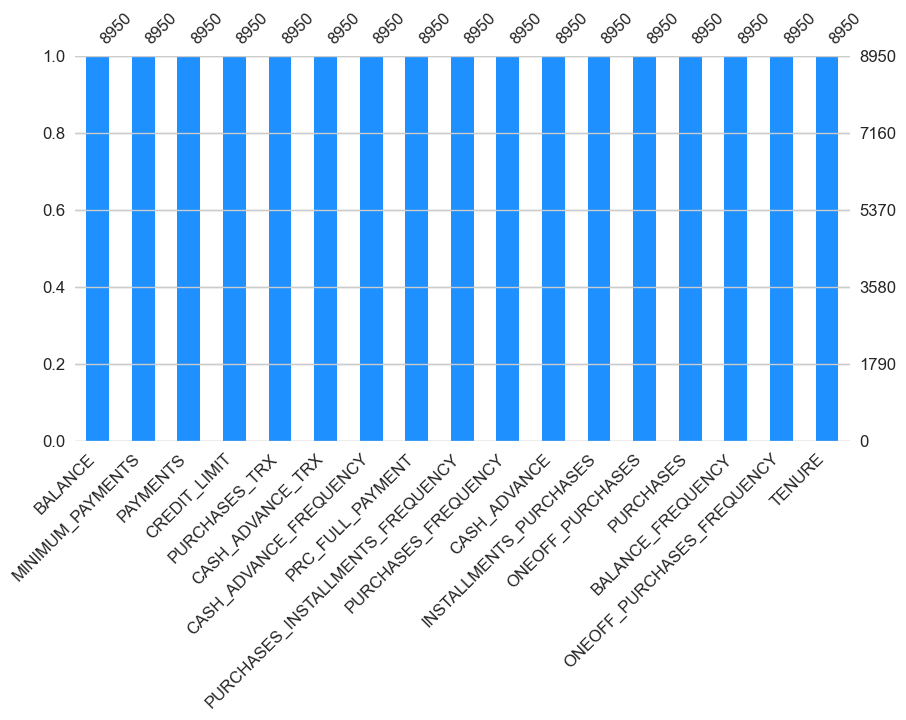

In [20]:
# visualisasi proporsi missing value
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

    sudah tidak terdapat missing value pada setiap kolomnya

## Explorasi Data
Pada bagian ini akan dilakukan eksplorasi pada dataset untuk melihat karakteristik atau keadaan setiap variabel data berdasarkan visualisasi

In [21]:
# Melihat statistik deskriptif pada data numerik
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.240448,1733.143852,846.358612,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.666134,2895.063757,2335.037702,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,167.113029,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,301.723829,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,804.748356,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Diperoleh informasi bahwa:

* rata-rata saldo/Balance dari semua nasabah yaitu 1564 dollar
* rata-rata saldo terupdate dari semua nasabah yakni 0,877 yang artinya mayoritas nasabah aktif mengupdate saldonya.
* Purchases paling banyak yakni 49039.57 purchases
* Credit limit minimal yaitu 50 dollar dan maksimal yaitu 30000 dollar.

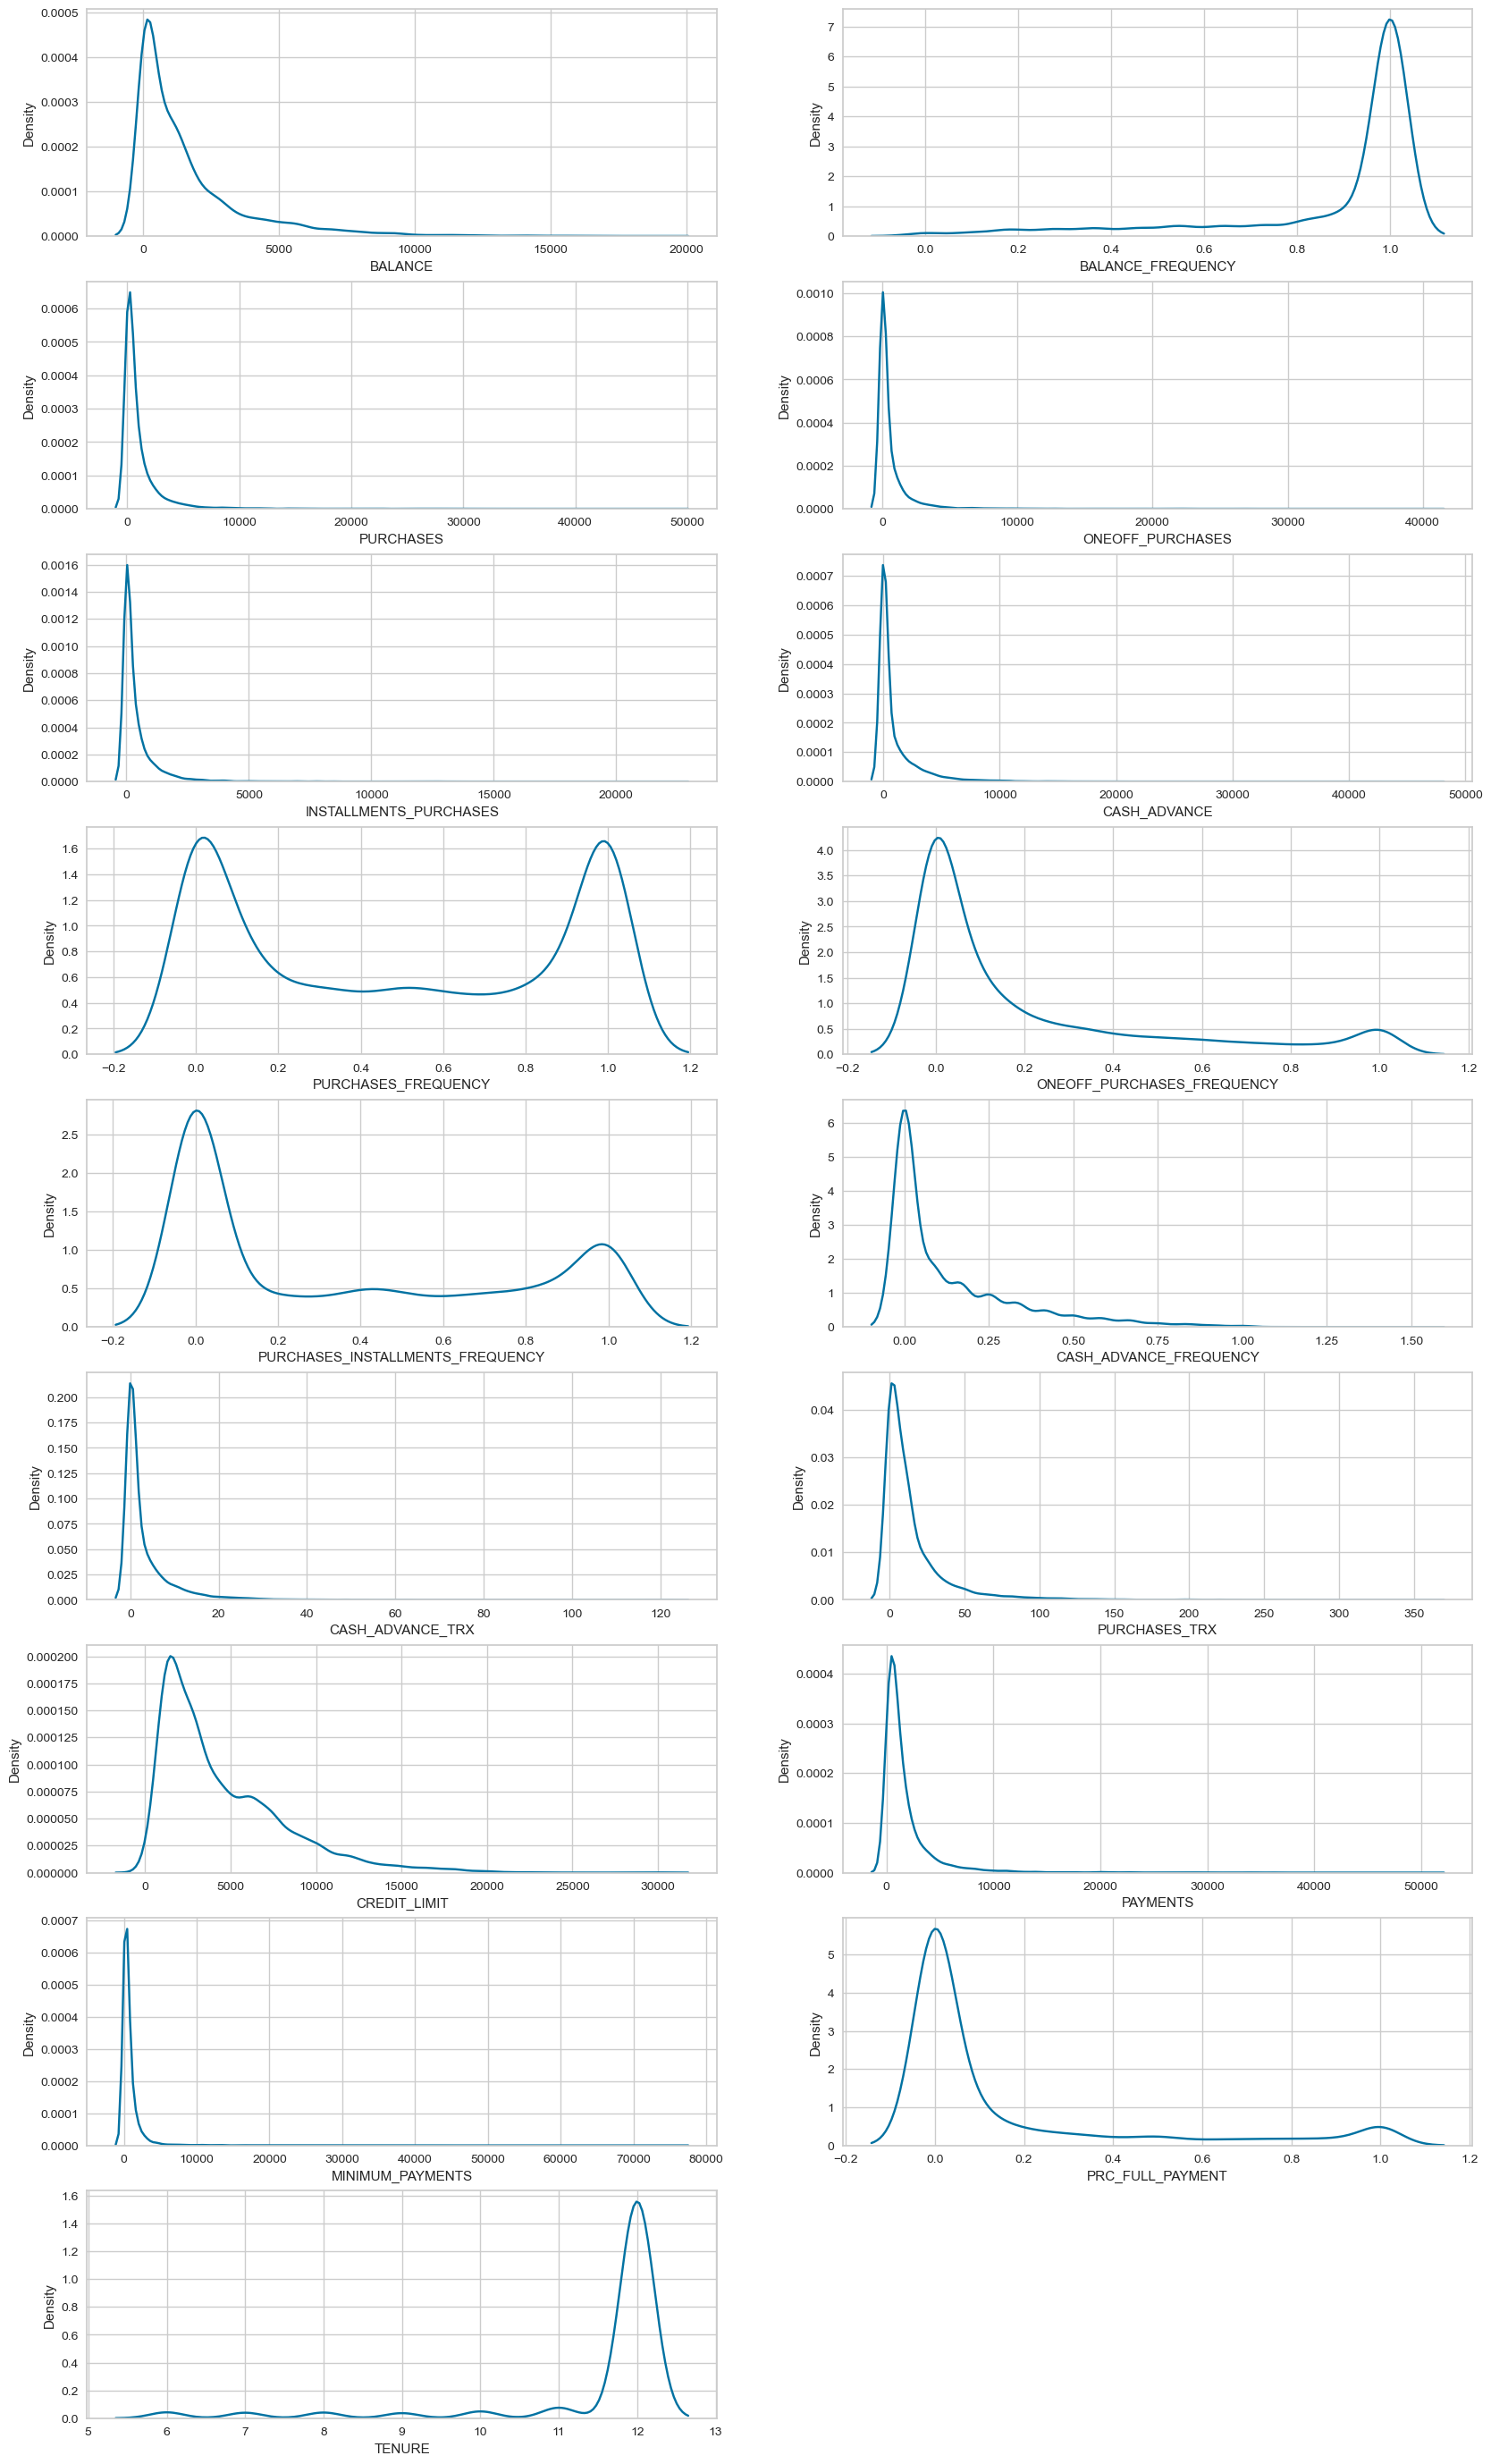

In [22]:
# membuat plot
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

    Dataset ini menunjukkan adanya variasi yang signifikan dan cenderung kemiringan yang besar, menandakan adanya pelanggan yang melakukan transaksi dengan jumlah yang sangat tinggi.

In [23]:
# transformasi logaritmik pada kolom terpilih
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
        'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 
        'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

for col in cols:
    df[col] = np.log(1 + df[col])

    Dalam pemilihan variabel tersebut, faktor-faktor yang menjadi pertimbangan meliputi skewness atau ketimpangan distribusi data, kemungkinan adanya nilai ekstrem atau outlier.
    Dengan menerapkan transformasi logaritmik pada kolom-kolom terpilih, kita dapat mengubah distribusi data menjadi lebih simetris, mengurangi skewness, serta meningkatkan interpretasi dan stabilisasi variansi.

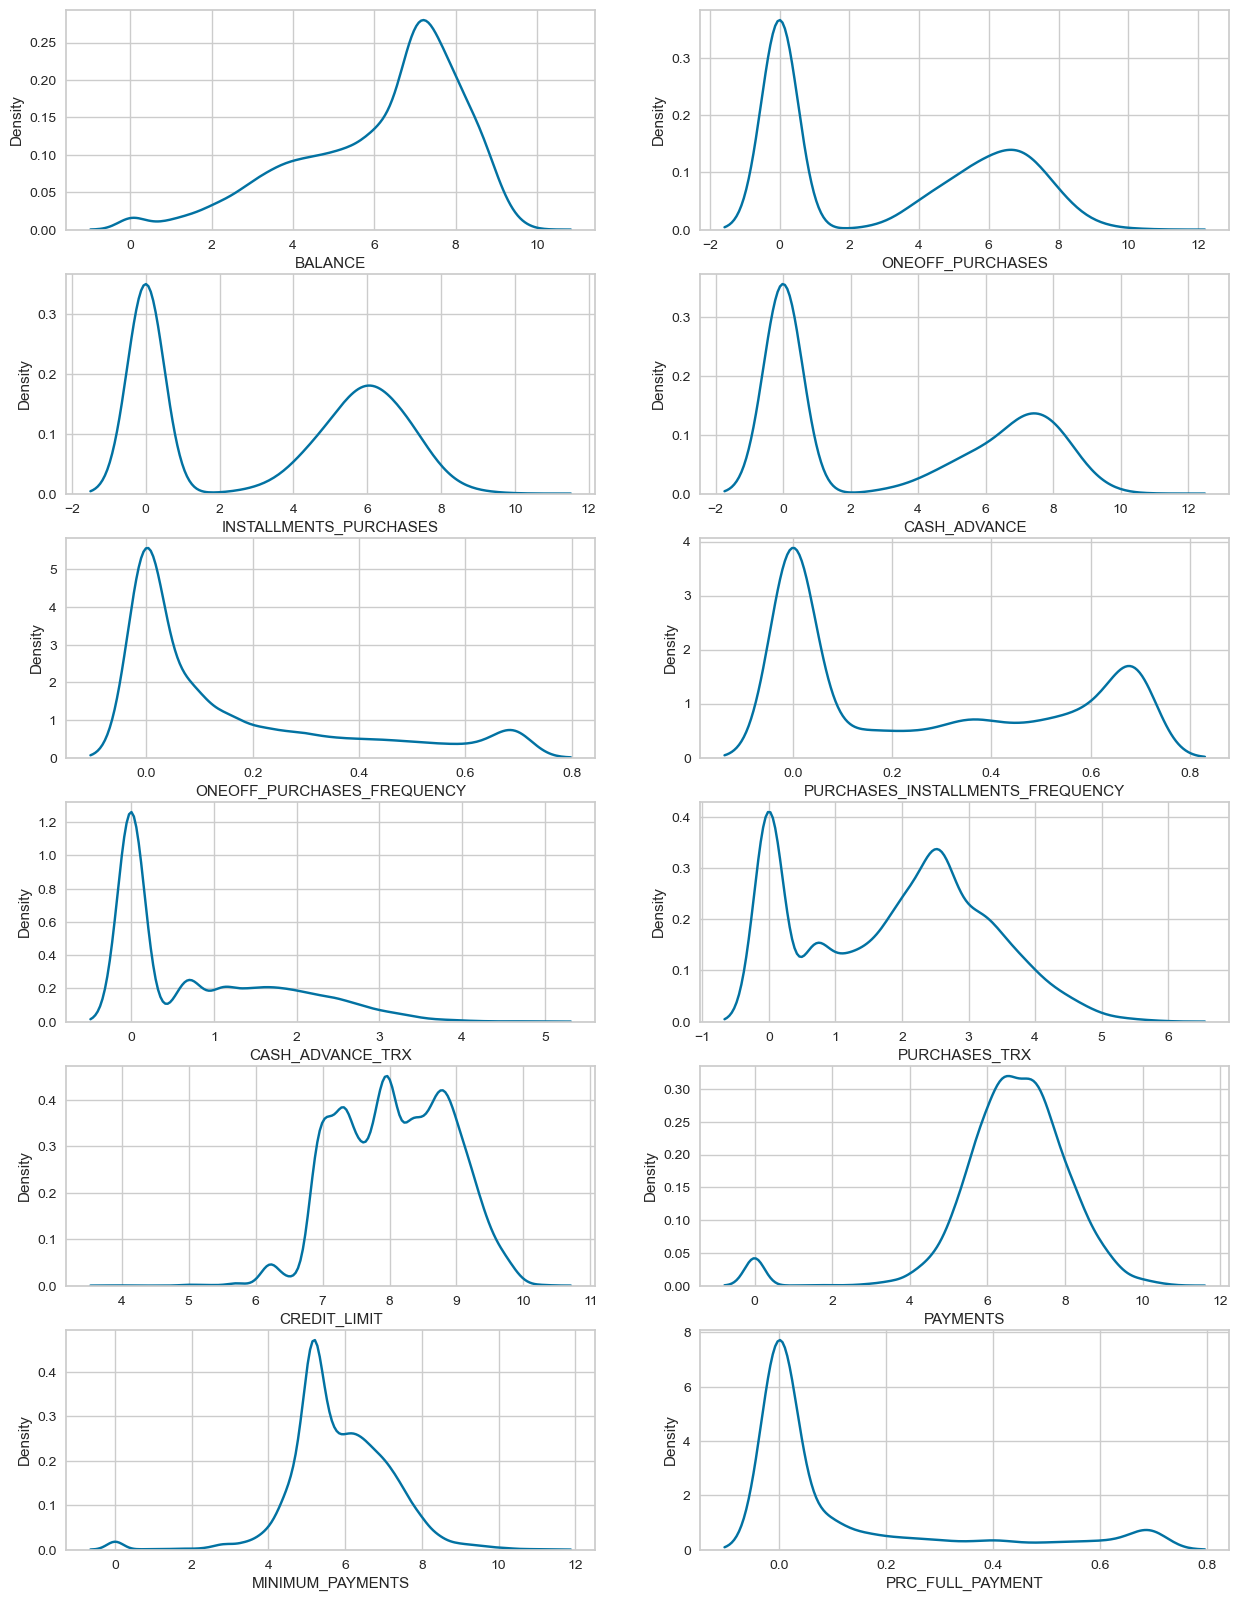

In [24]:
# membuat plot
plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()

    Meskipun distribusinya tidak mencapai kondisi yang ideal, perbaikan ini menunjukkan kemajuan positif dari kondisi awal.

### Handling Outliers
untuk mengidentifikasi, memeriksa, dan mengatasi nilai-nilai ekstrim atau tidak biasa dalam dataset agar tidak mengganggu analisis atau model statistik yang sedang dilakukan.

In [25]:
# Cek Outliers
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_quartile = Q3 + 1.5*IQR
    lower_quartile = Q1 - 1.5*IQR
    
    if df[(df[i] > upper_quartile) | (df[i] < lower_quartile)].any(axis=None):
        print(i, "Yes")
    else :
        print(i, "No")

BALANCE Yes
BALANCE_FREQUENCY Yes
PURCHASES Yes
ONEOFF_PURCHASES No
INSTALLMENTS_PURCHASES No
CASH_ADVANCE No
PURCHASES_FREQUENCY No
ONEOFF_PURCHASES_FREQUENCY Yes
PURCHASES_INSTALLMENTS_FREQUENCY No
CASH_ADVANCE_FREQUENCY Yes
CASH_ADVANCE_TRX Yes
PURCHASES_TRX No
CREDIT_LIMIT Yes
PAYMENTS Yes
MINIMUM_PAYMENTS Yes
PRC_FULL_PAYMENT Yes
TENURE Yes


    Banyak variabel yang mengandung outliers, untuk membentuk model yang baik maka data tidak boleh mengandung outlier

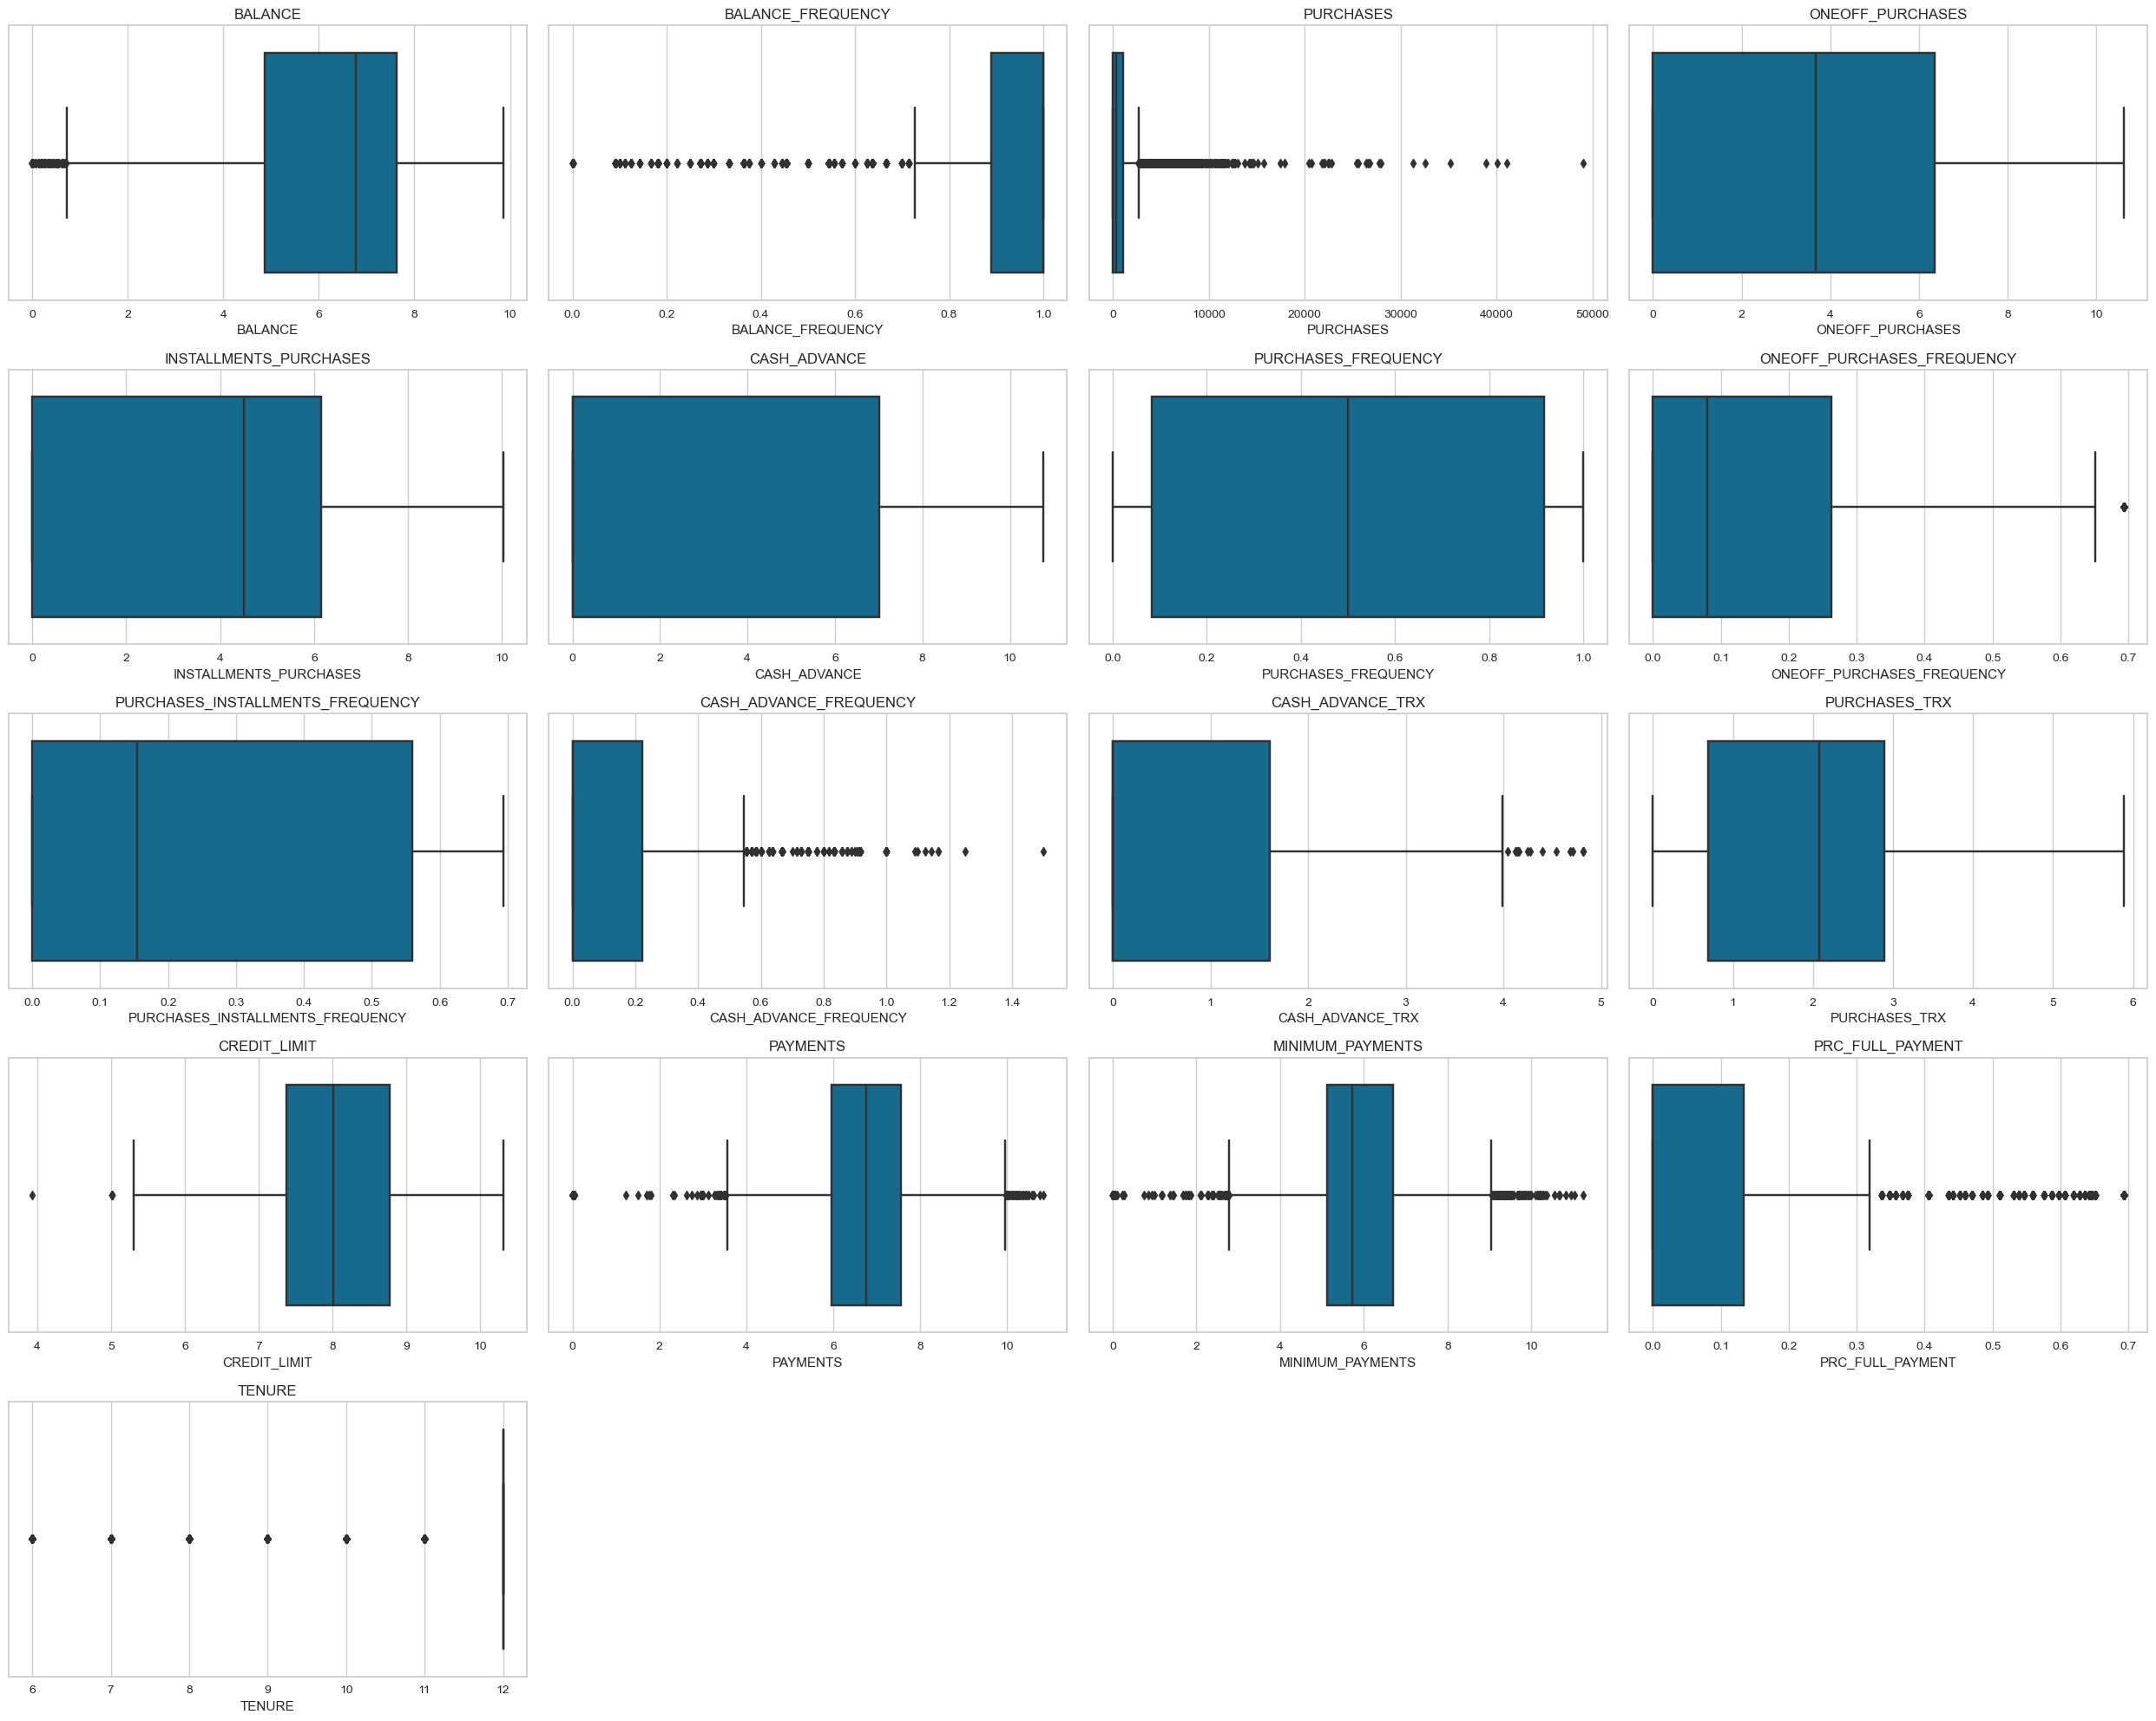

In [26]:
# plot untuk deteksi outlier
plt.figure(figsize=(25,20))
for i in range(len(df.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[df.columns[i]])
    plt.title(df.columns[i])
    
plt.tight_layout()

    Outlier pada variabel terdapat, dapat dilihat bahwa terdapat banyak sekali nilai yang sangat jauh dari rata-rata

In [27]:
# menampilkan dataaframe
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.818182,95.40,0.000000,4.568506,0.000000,0.166667,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,12.0
1,8.071989,0.909091,0.00,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,12.0
2,7.822504,1.000000,773.17,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,12.0
3,7.419183,0.636364,1499.00,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.068936,0.000000,12.0
4,6.707735,1.000000,16.00,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,1.000000,291.12,0.000000,5.677165,0.000000,1.000000,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,6.0
8946,3.004851,1.000000,300.00,0.000000,5.707110,0.000000,1.000000,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,5.850214,0.000000,6.0
8947,3.194529,0.833333,144.40,0.000000,4.979489,0.000000,0.833333,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,6.0
8948,2.671218,0.833333,0.00,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.166667,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,6.0


In [28]:
# membuat fungsi untuk menghasilkan IQR, batas bawah, dan batas atas
def find_outlier(df, feature):
    print('Outlier ' + feature)
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    Lower_Limit = q1 - limit
    Upper_Limit = q3 + limit
    print(f'Lower_Limit: {Lower_Limit}')
    print(f'Upper_Limit: {Upper_Limit}')
    print('_________________________')

In [29]:
# periksa IQR, batas atas, dan batas bawah untuk setiap fitur
for i in df :
    find_outlier(df, i)

Outlier BALANCE
IQR: 2.766103907929077
Lower_Limit: 0.7128394793291024
Upper_Limit: 11.77725511104541
_________________________
Outlier BALANCE_FREQUENCY
IQR: 0.11111099999999996
Lower_Limit: 0.7222225000000001
Upper_Limit: 1.1666664999999998
_________________________
Outlier PURCHASES
IQR: 1070.4950000000001
Lower_Limit: -1566.1075000000003
Upper_Limit: 2715.8725000000004
_________________________
Outlier ONEOFF_PURCHASES
IQR: 6.360273504698046
Lower_Limit: -9.54041025704707
Upper_Limit: 15.900683761745116
_________________________
Outlier INSTALLMENTS_PURCHASES
IQR: 6.151961119458865
Lower_Limit: -9.227941679188298
Upper_Limit: 15.379902798647162
_________________________
Outlier CASH_ADVANCE
IQR: 7.016449255072967
Lower_Limit: -10.52467388260945
Upper_Limit: 17.54112313768242
_________________________
Outlier PURCHASES_FREQUENCY
IQR: 0.833334
Lower_Limit: -1.166668
Upper_Limit: 2.166668
_________________________
Outlier ONEOFF_PURCHASES_FREQUENCY
IQR: 0.26236426446749106
Lower_Limit

    Variabel "TENURE" tidak diikutsertakan dalam proses penanganan outlier karena variabel ini merupakan jenis variabel kategorikal yang mewakili lamanya waktu penggunaan kartu kredit. Variabel kategorikal seperti ini umumnya tidak memiliki outliers yang relevan untuk diidentifikasi atau diatasi menggunakan teknik seperti boxplot.
    Outliers biasanya terkait dengan variabel numerik yang memiliki rentang nilai yang kontinu. Pada variabel kategorikal seperti "TENURE", nilainya terbatas pada beberapa kategori diskrit, misalnya durasi penggunaan kartu kredit dalam jumlah bulan tertentu. Oleh karena itu, konsep outliers tidak diterapkan pada variabel ini.

In [30]:
# menghapus variabel yang memiliki outliers
df.iloc[:,:-1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,3.735304,0.818182,95.40,0.000000,4.568506,0.000000,0.166667,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000
1,8.071989,0.909091,0.00,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.250000,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671
2,7.822504,1.000000,773.17,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000
3,7.419183,0.636364,1499.00,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.083333,0.693147,0.693147,8.922792,0.000000,6.068936,0.000000
4,6.707735,1.000000,16.00,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,1.000000,291.12,0.000000,5.677165,0.000000,1.000000,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465
8946,3.004851,1.000000,300.00,0.000000,5.707110,0.000000,1.000000,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,5.850214,0.000000
8947,3.194529,0.833333,144.40,0.000000,4.979489,0.000000,0.833333,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144
8948,2.671218,0.833333,0.00,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.166667,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144


In [31]:
# Menghapus Outlier dengan Metode IQR pada DataFrame
for i in df.iloc[:,:-1]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    Upper_Limit = Q3 + 1.5 * IQR
    Lower_Limit = Q1 - 1.5 * IQR
    df.loc[df[i] > Upper_Limit,i] = Upper_Limit
    df.loc[df[i] < Lower_Limit,i] = Lower_Limit

In [32]:
# Deteksi dan Penanganan Outlier dengan Metode IQR pada DataFrame
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    upper_quartile = Q3 + 1.5*IQR
    lower_quartile = Q1 - 1.5*IQR

    if df[(df[i] > upper_quartile) | (df[i] < lower_quartile)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE no
BALANCE_FREQUENCY no
PURCHASES no
ONEOFF_PURCHASES no
INSTALLMENTS_PURCHASES no
CASH_ADVANCE no
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY no
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY no
CASH_ADVANCE_TRX no
PURCHASES_TRX no
CREDIT_LIMIT no
PAYMENTS no
MINIMUM_PAYMENTS no
PRC_FULL_PAYMENT no
TENURE yes


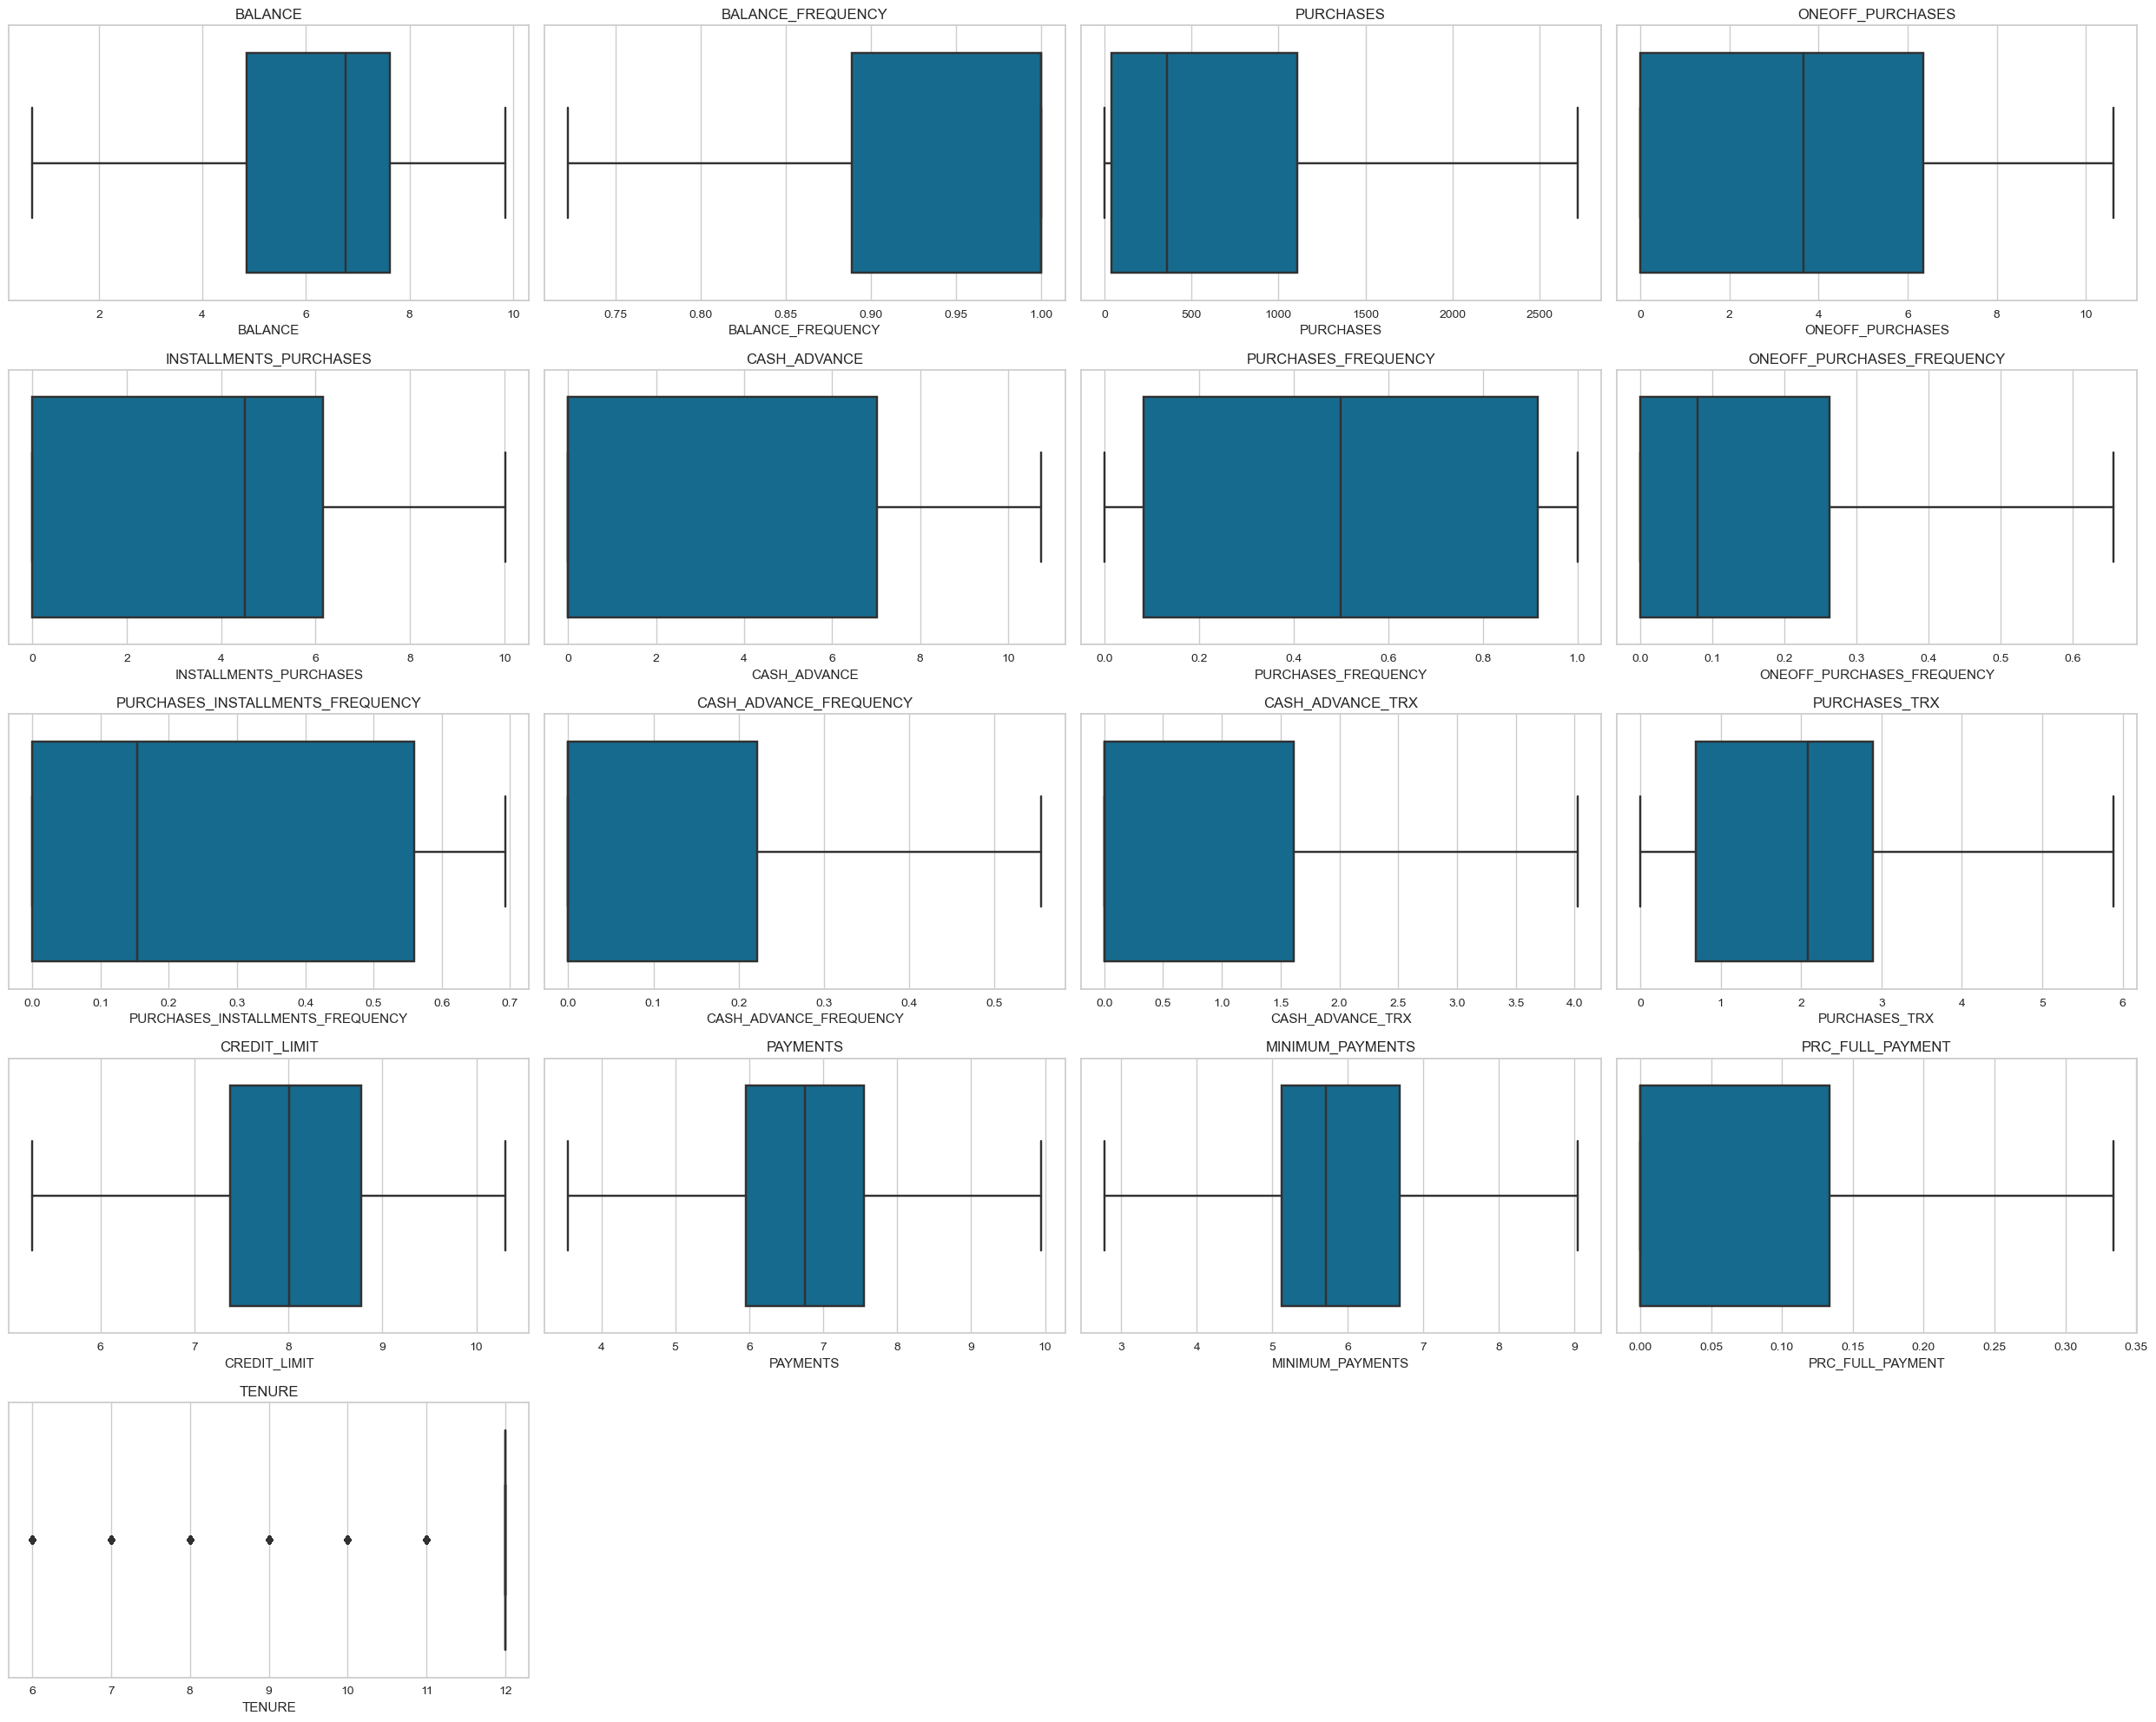

In [33]:
# plot untuk deteksi outlier
plt.figure(figsize=(25,20))
for i in range(len(df.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[df.columns[i]])
    plt.title(df.columns[i])
    
plt.tight_layout()

    Sudah tidak ada outliers pada variabel numerik yang memiliki rentang nilai yang kontinu.

### Correlation Matrix
menunjukkan hubungan statistik antara dua atau lebih variabel dalam dataset, dengan menghitung koefisien korelasi antara setiap pasangan variabel.

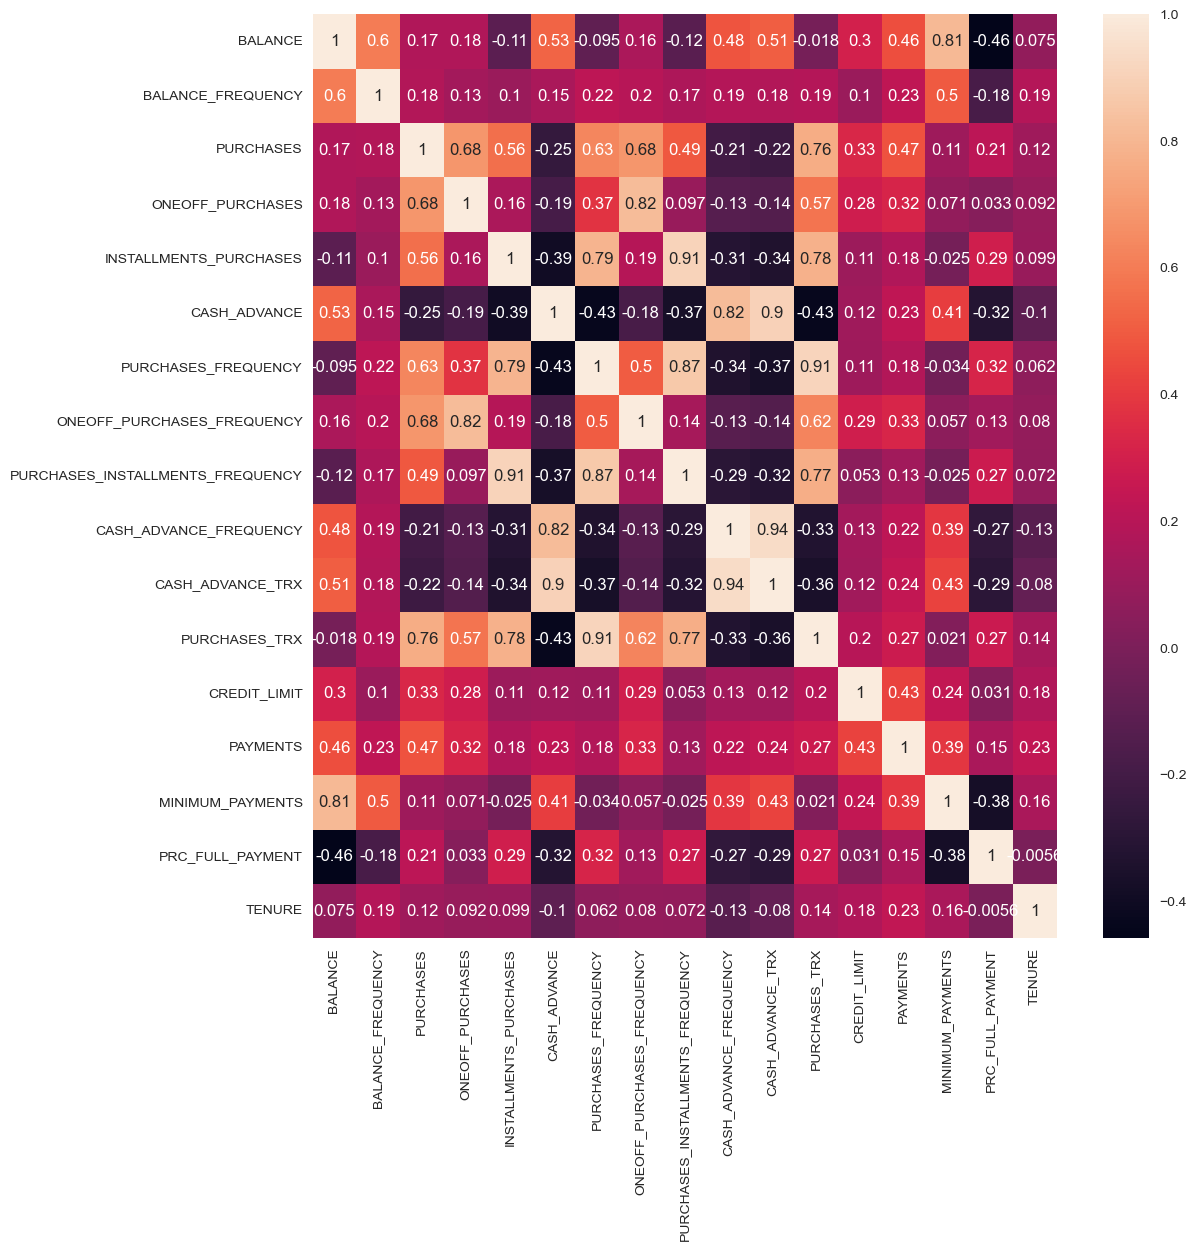

In [34]:
# membuat plot matrix korelasi
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

    Terlihat bahwa terdapat korelasi yang tinggi (>0.8) diantara atribut:
    * ONEOFF_PURCHASES dan ONEOFF_PURCHASES_FREQUENCY
    * INSTALLMENTS_PURCHASES dan PURCHASES_INSTALLMENTS_FREQUENCY
    * PURCHASES_FREQUENCY dan PURCHASES_TRX
    * PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY
    * CASH_ADVANCE_TRX dan CASH_ADVANCE
    * CASH_ADVANCE_TRX dan CASH_ADVANCE_FREQUENCY

In [35]:
# Mencari korelasi Pearson antara fitur
corr_matrix = df.corr().abs()

# Membuat matriks diagonal dengan nilai 1
np.fill_diagonal(corr_matrix.values, 0)

# Mencari pasangan fitur dengan korelasi Pearson > 0.8
high_corr = np.where(corr_matrix > 0.8)

# Menampilkan pasangan fitur yang berkorelasi tinggi
for i in range(len(high_corr[0])):
    row = high_corr[0][i]
    col = high_corr[1][i]
    corr = corr_matrix.iloc[row, col]
    print(f"Fitur {corr_matrix.columns[row]} dan {corr_matrix.columns[col]} berkorelasi tinggi ({corr})")

Fitur BALANCE dan MINIMUM_PAYMENTS berkorelasi tinggi (0.8085989274828036)
Fitur ONEOFF_PURCHASES dan ONEOFF_PURCHASES_FREQUENCY berkorelasi tinggi (0.8203001486408104)
Fitur INSTALLMENTS_PURCHASES dan PURCHASES_INSTALLMENTS_FREQUENCY berkorelasi tinggi (0.9054428977055486)
Fitur CASH_ADVANCE dan CASH_ADVANCE_FREQUENCY berkorelasi tinggi (0.8202451311151953)
Fitur CASH_ADVANCE dan CASH_ADVANCE_TRX berkorelasi tinggi (0.8993241913300188)
Fitur PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY berkorelasi tinggi (0.86630878097437)
Fitur PURCHASES_FREQUENCY dan PURCHASES_TRX berkorelasi tinggi (0.9090244465801143)
Fitur ONEOFF_PURCHASES_FREQUENCY dan ONEOFF_PURCHASES berkorelasi tinggi (0.8203001486408104)
Fitur PURCHASES_INSTALLMENTS_FREQUENCY dan INSTALLMENTS_PURCHASES berkorelasi tinggi (0.9054428977055486)
Fitur PURCHASES_INSTALLMENTS_FREQUENCY dan PURCHASES_FREQUENCY berkorelasi tinggi (0.86630878097437)
Fitur CASH_ADVANCE_FREQUENCY dan CASH_ADVANCE berkorelasi tinggi (0.82024

### Scatter Plot

In [36]:
# Mengecek detail kolom mulai dari jumlah, tipe data, dan data null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

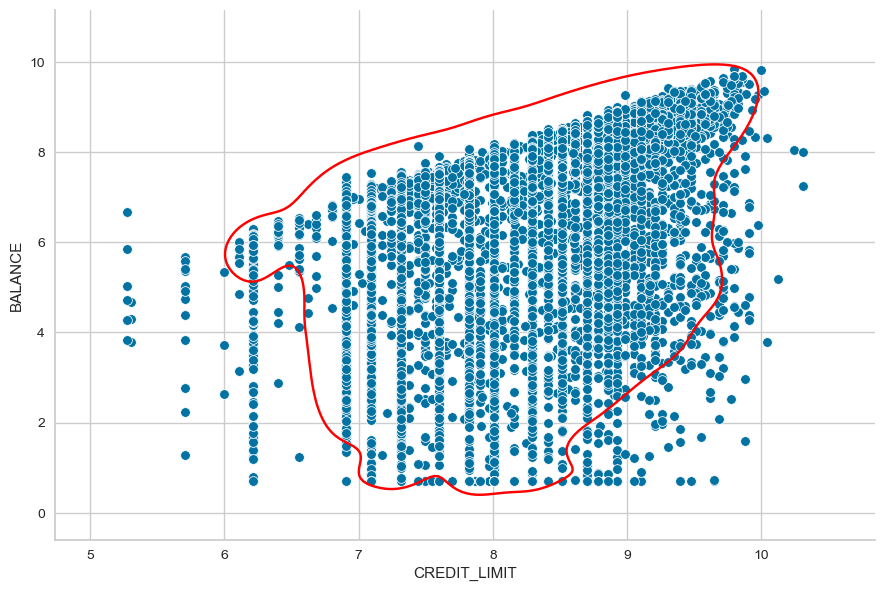

In [37]:
# plot batas kredit hubungan dengan saldo
sns.pairplot(data=df, x_vars='CREDIT_LIMIT', y_vars='BALANCE', 
             height=6, aspect=1.5).map(sns.kdeplot, levels=1, color='red')

**Analisis:**
* Terdapat hubungan positif antara batas kredit dan saldo. Semakin tinggi batas kredit seseorang, cenderung saldo kartu kreditnya juga lebih tinggi. Hal ini dapat dilihat dari kepadatan yang lebih tinggi di sepanjang sumbu vertikal saat batas kredit meningkat.
* Meskipun ada hubungan positif antara batas kredit dan saldo, terdapat penyebaran yang cukup luas di setiap titik. Ini menunjukkan bahwa ada variasi yang signifikan dalam saldo kartu kredit di antara pelanggan dengan batas kredit yang sama.
* Distribusi saldo cenderung lebih tinggi di antara pelanggan dengan batas kredit yang lebih tinggi. Ini dapat dilihat dari kepadatan yang lebih tinggi pada nilai saldo yang lebih tinggi saat batas kredit meningkat.
* Terdapat beberapa pelanggan dengan saldo kartu kredit yang tinggi meskipun batas kredit mereka rendah. Ini menunjukkan adanya kemungkinan pengelolaan kredit yang kurang optimal atau adanya faktor lain yang mempengaruhi saldo kartu kredit.

## Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [38]:
# memeriksa info detail untuk setiap fitur
listItem = []
for col in df.columns:
    unique_values = df[col].drop_duplicates().values
    sample_values = list(unique_values[:2]) if len(unique_values) >= 2 else list(unique_values)
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum() / len(df[col])) * 100, 2),
                    df[col].nunique(), sample_values])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'missing value', 'nullPct', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,missing value,nullPct,unique,uniqueSample
0,BALANCE,float64,0,0.0,8819,"[3.735303702663308, 8.07198906965229]"
1,BALANCE_FREQUENCY,float64,0,0.0,13,"[0.818182, 0.909091]"
2,PURCHASES,float64,0,0.0,5396,"[95.4, 0.0]"
3,ONEOFF_PURCHASES,float64,0,0.0,4014,"[0.0, 6.651791487715673]"
4,INSTALLMENTS_PURCHASES,float64,0,0.0,4452,"[4.5685062016165, 0.0]"
5,CASH_ADVANCE,float64,0,0.0,4323,"[0.0, 8.77089628414314]"
6,PURCHASES_FREQUENCY,float64,0,0.0,47,"[0.166667, 0.0]"
7,ONEOFF_PURCHASES_FREQUENCY,float64,0,0.0,47,"[0.0, 0.6559106611687276]"
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,0,0.0,47,"[0.08004239998118148, 0.0]"
9,CASH_ADVANCE_FREQUENCY,float64,0,0.0,26,"[0.0, 0.25]"


**Analisis:**
* Tipe Data: Semua fitur (kolom) dalam dataset ini memiliki tipe data float64, yang menunjukkan bahwa semua nilai dalam fitur-fitur tersebut adalah bilangan desimal.
* Missing Value: Tidak ada missing value dalam dataset ini. Setiap fitur memiliki jumlah nilai yang sama dengan jumlah baris dalam dataset (tidak ada nilai yang hilang).
* Persentase Missing Value: Persentase missing value untuk semua fitur adalah 0%, artinya tidak ada nilai yang hilang dalam dataset ini.
* Unique Values: Setiap fitur memiliki jumlah nilai unik yang berbeda-beda. Jumlah nilai unik tersebut dapat bervariasi dari fitur ke fitur, mulai dari 13 nilai unik untuk fitur BALANCE_FREQUENCY hingga 8715 nilai unik untuk fitur MINIMUM_PAYMENTS. Hal ini menunjukkan variasi dalam distribusi nilai pada setiap fitur.
* Contoh Nilai Unik: Untuk setiap fitur, diberikan contoh dua nilai unik yang ada dalam dataset. Misalnya, pada fitur BALANCE, contoh dua nilai unik adalah [3.735303702663308, 8.07198906965229].

### VIF
Variation Inflation Factor untuk mengukur sejauh mana variabel dalam model regresi bergantung pada variabel lainnya dengan mengidentifikasi tingkat multikolinieritas.

In [39]:
# Mengecek detail kolom mulai dari jumlah, tipe data, dan data null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [40]:
# Membuat salinan dataset dan memasukannya ke variabel baru
nba = df.copy()

    kolom variabel "TENURE" didrop, karena banyak memiliki outliers atau mengandung beberapa multikolinearitas yang nantinya akan mengurangi dimensi dataset tersebut, sehingga dapat menghasilkan representasi yang lebih efisien dan memudahkan interpretasi hasil PCA.

In [41]:
# Menghapus kolom tenure
nba.drop(['TENURE'], axis=1, inplace=True)

In [42]:
# Menghitung VIF (Multicollinearity)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [43]:
# Menghitung Variance Inflation Factor (VIF) pada Data NBA
jk = nba.iloc[:,[0,2,3,4,5,10,11,12,13,14,15]]
calc_vif(jk)

,variables,VIF
9,MINIMUM_PAYMENTS,70.913805
8,PAYMENTS,57.801101
7,CREDIT_LIMIT,53.103091
0,BALANCE,46.204851
6,PURCHASES_TRX,17.742366
4,CASH_ADVANCE,11.425269
5,CASH_ADVANCE_TRX,8.869625
3,INSTALLMENTS_PURCHASES,8.847162
1,PURCHASES,6.115645
2,ONEOFF_PURCHASES,6.063281


    VIF untuk melihat nilai multikonearitas yang besar

**Analisis:**
* Terdapat beberapa variabel yang menunjukkan adanya multicollinearity (keterkaitan tinggi antara variabel):
    - Variabel MINIMUM_PAYMENTS memiliki VIF tertinggi dengan nilai 70.914, diikuti oleh PAYMENTS dengan VIF 57.801 dan CREDIT_LIMIT dengan VIF 53.103. Hal ini menunjukkan adanya keterkaitan tinggi antara variabel-variabel tersebut.
    - Variabel BALANCE juga menunjukkan keterkaitan yang tinggi dengan VIF sebesar 46.205.
* Variabel PURCHASES_TRX, CASH_ADVANCE, CASH_ADVANCE_TRX, INSTALLMENTS_PURCHASES, PURCHASES, ONEOFF_PURCHASES, dan PRC_FULL_PAYMENT memiliki nilai VIF yang lebih rendah dibandingkan variabel-variabel sebelumnya. Ini menunjukkan tingkat keterkaitan yang lebih rendah antara variabel-variabel ini.

In [44]:
# Check skewness pada dataset
for i in jk.columns:
    print(i, ': ', jk[i].skew())

BALANCE :  -0.7965060989681726
PURCHASES :  1.2063801927134634
ONEOFF_PURCHASES :  0.18585352201056776
INSTALLMENTS_PURCHASES :  -0.024981407335231534
CASH_ADVANCE :  0.2625943575179137
CASH_ADVANCE_TRX :  0.9251306342084671
PURCHASES_TRX :  0.03269683973776026
CREDIT_LIMIT :  -0.0858342066810043
PAYMENTS :  -0.25316463992016625
MINIMUM_PAYMENTS :  0.16417668869003535
PRC_FULL_PAYMENT :  1.219274197868646


**Analisis:**
* Beberapa variabel, seperti PURCHASES, CASH_ADVANCE_TRX, dan PRC_FULL_PAYMENT, memiliki skewness positif yang tinggi, menunjukkan bahwa distribusi data condong ke kanan (ekor panjang di sebelah kanan).
* Variabel BALANCE dan PAYMENTS memiliki skewness negatif yang moderat, menunjukkan distribusi data condong ke kiri (ekor panjang di sebelah kiri).
* Beberapa variabel lainnya, seperti INSTALLMENTS_PURCHASES dan CREDIT_LIMIT, memiliki skewness yang mendekati simetris.

In [45]:
# Menangani outlier dengan metode IQR
wins = Winsorizer(capping_method='iqr', fold=3, tail='both')
jk_wins = wins.fit_transform(jk)

In [46]:
# Deteksi dan Penanganan Outlier dengan Metode IQR pada DataFrame
for i in jk_wins:
    Q1 = jk_wins[i].quantile(0.25)
    Q3 = jk_wins[i].quantile(0.75)
    IQR = Q3-Q1
    upper_quartile = Q3 + 1.5*IQR
    lower_quartile = Q1 - 1.5*IQR

    if jk_wins[(jk_wins[i] > upper_quartile) | (jk_wins[i] < lower_quartile)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE no
PURCHASES no
ONEOFF_PURCHASES no
INSTALLMENTS_PURCHASES no
CASH_ADVANCE no
CASH_ADVANCE_TRX no
PURCHASES_TRX no
CREDIT_LIMIT no
PAYMENTS no
MINIMUM_PAYMENTS no
PRC_FULL_PAYMENT no


    data tidak memiliki outlier berdasarkan batasan yang ditentukan menggunakan metode IQR

### Feature Scalling
mengubah skala numerik dari fitur dalam dataset agar memiliki rentang yang serupa, biasanya antara 0 dan 1, untuk meningkatkan performa algoritma machine learning

In [47]:
# Scaling
scaler = RobustScaler()
jk_scaler = pd.DataFrame(scaler.fit_transform(jk_wins))
jk_scaler.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.098374,-0.248371,-0.576007,0.011167,0.000000,0.000000,-0.446395,-0.783504,-0.901767,-0.489775,0.000000
1,0.469421,-0.337489,-0.576007,-0.731443,1.250048,1.000000,-0.946395,0.604504,0.978658,0.807659,1.502798
2,0.379228,0.384766,0.469827,-0.731443,0.000000,0.000000,0.220964,0.653731,-0.199976,0.465928,0.000000
3,0.233419,1.062798,0.573821,-0.731443,0.759885,0.430677,-0.630930,0.653731,-2.002153,0.227240,0.000000
4,-0.023783,-0.322542,-0.130552,-0.731443,0.000000,0.000000,-0.630930,-0.653517,-0.145917,-0.132942,0.000000


### PCA
untuk mengurangi dimensi dataset dengan mengidentifikasi kombinasi linier dari fitur yang paling penting

In [48]:
# Fit PCA
pca = PCA(random_state=0)
pca.fit(jk_scaler)

PCA(random_state=0)

    Pada tahap menentukan jumlah komponen PCA yang mencapai kumulatif varians 95%, bertujuaan untuk: 
    1. Memastikan representasi variabilitas yang tinggi dalam data. 
    2. Signifikansi dalam mengurangi dimensi data. 
    3. Mencapai keseimbangan antara representasi yang baik dan efisiensi pengolahan data.

In [49]:
# Menentukan Jumlah Komponen PCA yang Mencapai Kumulatif Varians 95%
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [50]:
# Menghitung Kumulatif Varians pada PCA
np.cumsum(pca.explained_variance_ratio_)

array([0.32792911, 0.63262456, 0.76447559, 0.82471748, 0.87368408,
       0.91659647, 0.9541293 , 0.9733176 , 0.98863936, 0.99453064,
       1.        ])

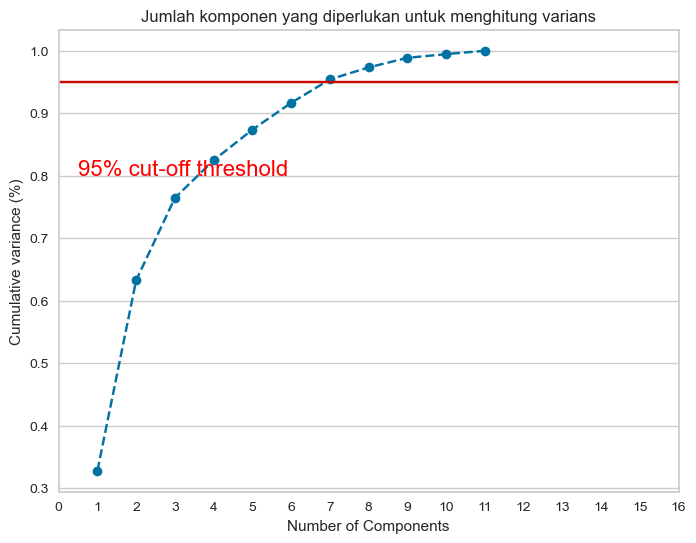

In [51]:
# Visualisasi Kumulatif Varians pada PCA
plt.rcParams["figure.figsize"] = (8,6)

fig, ax = plt.subplots()
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 17, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('Jumlah komponen yang diperlukan untuk menghitung varians')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.80, '95% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

        untuk data pca, data tersebut validasinya 95% dari validasi 7 komponen.

In [52]:
# Reduksi komponen menggunakan PCA
pca_final = PCA(n_components=7)
pca_final.fit(jk_scaler)
X_pca = pca_final.transform(jk_scaler)

In [53]:
print('Shape sebelum reduksi komponen ', jk_scaler.shape)
print('---')
print('Shape setelah reduksi komponen ', X_pca.shape)
print('Jumlah komponen setelah reduksi ', pca_final.n_components_)
print('Variansi yang dapat dijelaskan ', round((np.sum(pca_final.explained_variance_ratio_)*100),2))

Shape sebelum reduksi komponen  (8950, 11)
---
Shape setelah reduksi komponen  (8950, 7)
Jumlah komponen setelah reduksi  7
Variansi yang dapat dijelaskan  95.41


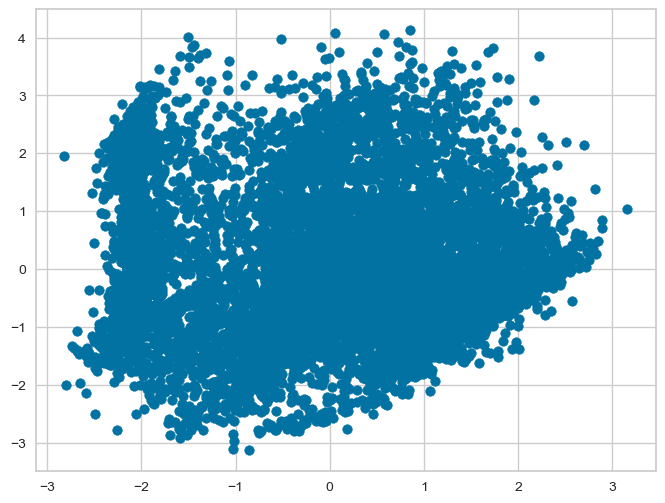

In [54]:
# Visualisasi Scatter Plot dengan Komponen PCA
plt.scatter(X_pca[:,0], X_pca[:,1])

    dapat dilihat bahwa pesebaran data dari -3 sampai 3

## Model Defining
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model

### Cluster Defining
untuk mengidentifikasi dan menentukan kluster atau kelompok dari data berdasarkan atribut atau fitur tertentu

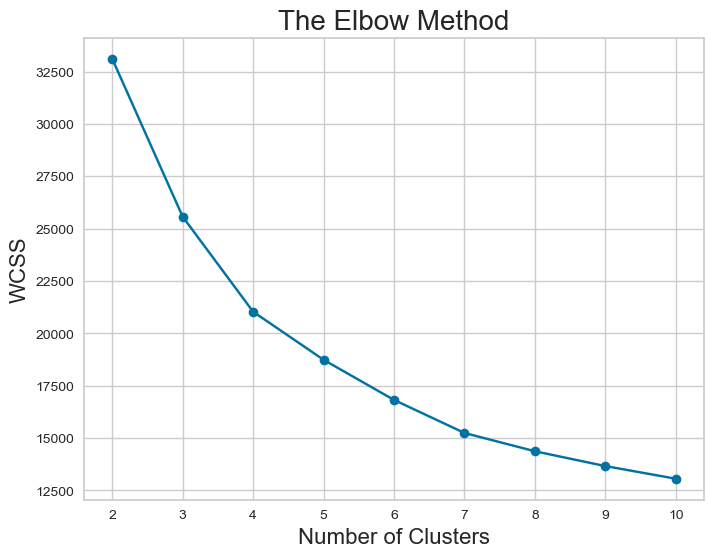

In [55]:
# Membuat variabel kosong atau penampung wcss
wcss = []

# Membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X_pca)
    wcss.append(km.inertia_)

#Membuat visualisasi wcss
plt.plot(range(2, 11), wcss, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters', fontsize = 16)
plt.ylabel('WCSS', fontsize = 16)
plt.show()

    Dalam grafik, kita mencari titik di mana penurunan inertia tidak signifikan lagi (bentuk siku). Titik ini menunjukkan jumlah cluster yang optimum. Dalam kasus ini, kita melihat bahwa bentuk siku terlihat jelas pada jumlah cluster 4.
    Jadi, berdasarkan analisis menggunakan metode elbow, nilai optimumnya adalah 4, yang berarti kita harus menggunakan 4 cluster untuk data yang diberikan.

In [56]:
# Cetak Rata-Rata Skor Silhouette
for i in np.arange(2,8):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(X_pca)
  score = silhouette_score(X_pca, km.labels_, metric='euclidean')
  print('Silhouette Score Komponen', i ,':' ,'%.3f' % score)

Silhouette Score Komponen 2 : 0.261
Silhouette Score Komponen 3 : 0.271
Silhouette Score Komponen 4 : 0.270
Silhouette Score Komponen 5 : 0.266
Silhouette Score Komponen 6 : 0.260
Silhouette Score Komponen 7 : 0.246


    Berdasarkan informasi yang diberikan, telah dilakukan analisis clustering dengan jumlah komponen/clusters yang berbeda. Dari hasil tersebut, terdapat kesimpulan bahwa pengelompokan dengan 3 komponen (Komponen 3) memberikan hasil yang paling baik dengan nilai silhouette score tertinggi sebesar 0.271. Ini menunjukkan adanya pemisahan yang lebih baik antar kluster dalam pengelompokan tersebut.
    Komponen 4 dan 5 juga memberikan hasil yang relatif baik dengan silhouette score masing-masing sebesar 0.270 dan 0.266. Ini menunjukkan adanya sejumlah pemisahan yang baik antara kluster dalam pengelompokan tersebut.
    Sedangkan pengelompokan dengan jumlah komponen lainnya memiliki nilai silhouette score yang lebih rendah, menunjukkan adanya ketidakjelasan atau kurangnya pemisahan yang optimal antara kluster.

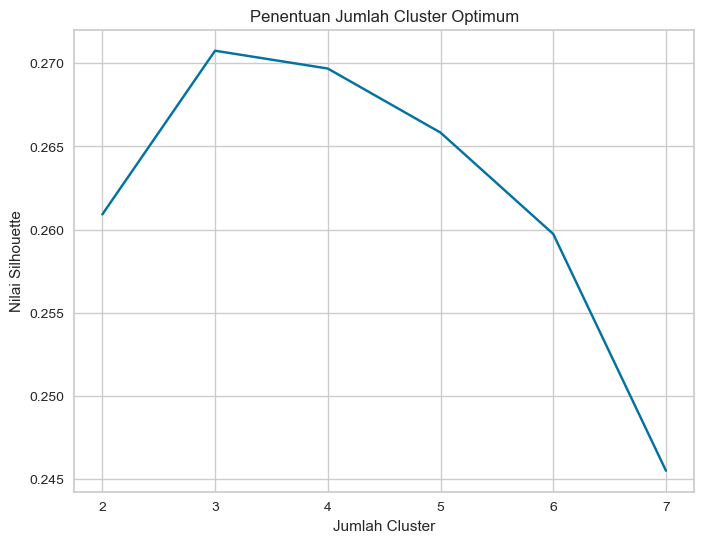

In [57]:
# Menginisialisasi nilai K-means dengan jumlah cluster yang berbeda
clusters = range(2, 8)
silhouette_scores = []

# Melakukan K-means pada setiap nilai cluster dan menghitung nilai silhouette
for k in clusters:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

# Menampilkan plot nilai silhouette
plt.plot(clusters, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Nilai Silhouette')
plt.title('Penentuan Jumlah Cluster Optimum')
plt.show()

    pada range 2 samapi 7 nilai optimum dari grafik tersebut adalah 3.

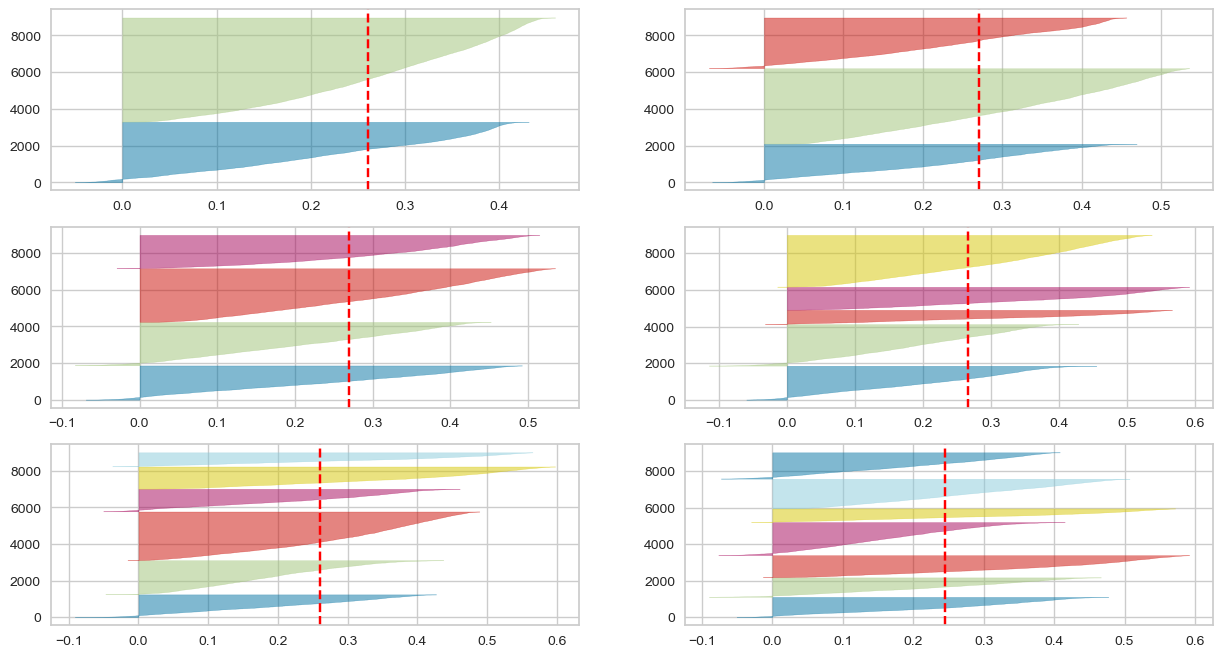

In [58]:
# Visualisasi Skor Silhouette
fig, ax = plt.subplots(3, 2, figsize = (15,8))
for i in np.arange(2,8):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  q, mod = divmod(i,2)

  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(X_pca)

    Berdasarkan visualisasi skor silhouette dan data yang diberikan, dapat disimpulkan bahwa data tersebut memiliki variasi yang signifikan antara klaster-klasternya. Skor silhouette yang tinggi menunjukkan adanya pemisahan yang baik antara klaster-klaster tersebut, sedangkan skor silhouette yang rendah menunjukkan adanya tumpang tindih antara klaster-klaster tersebut. Hal ini mengindikasikan bahwa data tersebut memiliki karakteristik yang berbeda-beda di setiap klaster, dan pemisahan yang baik antara klaster-klaster tersebut dapat memberikan wawasan yang lebih mendalam terkait pola dan karakteristik dari masing-masing klaster pada dataset tersebut.
    Dari grafik tersebut yang nilai yang paling optimum adalah 4. Nilai ini akan digunakan pada n_cluster yaitu 4.

### K-Means
Berdasarkan Elbow method maupun nilai silhouette diperoleh nilai clusternya 4. Jadi setiap nasabah dikelompokkan berdasarkan Cluster 0, 1, 2, dan 3.

In [59]:
km_final = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

## Model Training
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan dengan Jumlah Klaster=4 pada model K-Means

In [60]:
km_final.fit(X_pca)

KMeans(n_clusters=4, n_init=10, random_state=0)

## Model Prediction
Pemodelan prediksi K-Means: Penentuan Klaster pada DataFrame

In [61]:
clusters = km_final.fit_predict(X_pca)
clusters

array([1, 2, 0, ..., 1, 1, 1])

In [62]:
# Print iterasi yang konvergen
km_final.n_iter_

14

## Model Evaluation
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih.

In [63]:
# Reduksi komponen menggunakan PCA
pca_visualisasi = PCA(n_components=2)
pca_visualisasi.fit(jk_scaler)
X_visualisasi = pca_visualisasi.transform(jk_scaler)

In [64]:
# Membuat dataframe PC1 dan PC2
reduced_data= pd.DataFrame(X_visualisasi, columns= ['PC1','PC2'])
reduced_data.head()

,PC1,PC2
0,-0.580085,-1.658993
1,1.059384,0.155138
2,0.445510,0.396273
3,0.503401,-0.457689
4,0.286276,-1.021964


In [65]:
# Membuat kolom baru yang bernama Clusters
reduced_data['Clusters']= clusters
reduced_data

,PC1,PC2,Clusters
0,-0.580085,-1.658993,1
1,1.059384,0.155138,2
2,0.445510,0.396273,0
3,0.503401,-0.457689,1
4,0.286276,-1.021964,1
...,...,...,...
8945,-2.412485,-1.127663,3
8946,-0.580237,-1.204225,1
8947,-1.881172,-1.700957,1
8948,-1.405573,-2.595539,1


    Berdasarkan data yang diberikan, dapat diamati bahwa setiap sampel memiliki nilai PC1 dan PC2 yang mewakili posisi relatif mereka dalam ruang fitur. Selain itu, setiap sampel juga telah diklasifikasikan ke dalam salah satu dari 4 klaster, yang ditunjukkan oleh kolom "Clusters".

In [66]:
# Mengidentifikasi Uniknya Cluster dalam Data yang Telah Direduksi
reduced_data.Clusters.unique()

array([1, 2, 0, 3])

    terdapat 4 cluster, diantaranya kkelas 0,1,2 dan 3

## Model Visualization
untuk memvisualisasikan hubungan, pola, atau tingkat pentingnya variabel atau fitur dalam model

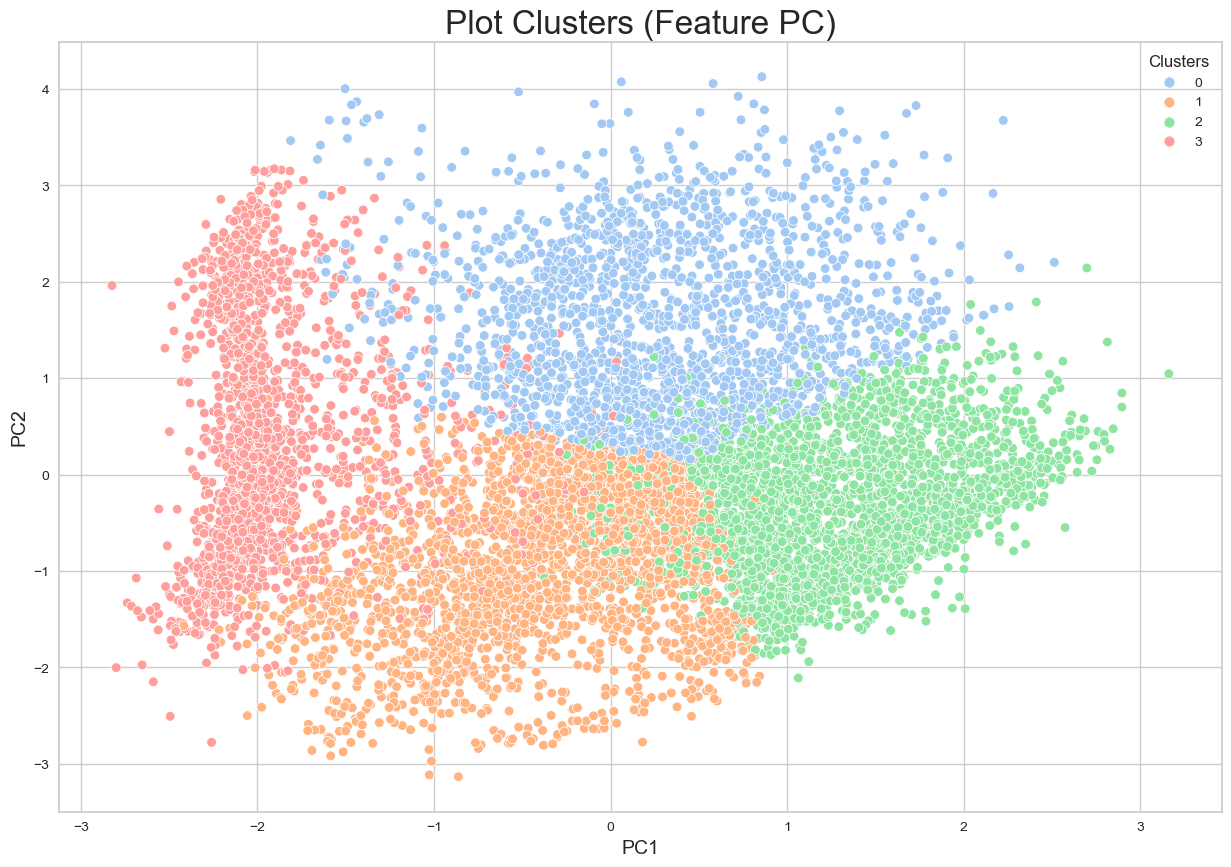

In [67]:
# Visualisasi Plot Cluster dengan Fitur PC
plt.figure(figsize=(15,10))
sns.scatterplot(x='PC1', y='PC2', data=reduced_data, hue="Clusters",palette='pastel')
plt.title('Plot Clusters (Feature PC)',fontsize=24)
plt.xlabel('PC1',fontsize=14)
plt.ylabel('PC2',fontsize=14)
plt.show()

    Cluster digunakan untuk memisahkan kelompok-kelompok data yang berbeda. Berdasarkan hasil diatas, algoritma sudah baik dalam memisahkan kelompok-kelomppoknya, tetapi didalam cluster masih sedikit tercampur dengan cluster lain. Kita dapat melihat beberapa jenis cluster yang berbeda, diantaranya cluster 0, 1, 2, dan 3. Kita mungkin melihat outliers dari beberapa data tersebut.

In [68]:
# Concat dengan cluster
df_cluster = jk_scaler.copy()
df_cluster['Clusters']= clusters
df_cluster

,0,1,2,3,4,5,6,7,8,9,10,Clusters
0,-1.098374,-0.248371,-0.576007,0.011167,0.000000,0.000000,-0.446395,-0.783504,-0.901767,-0.489775,0.000000,1
1,0.469421,-0.337489,-0.576007,-0.731443,1.250048,1.000000,-0.946395,0.604504,0.978658,0.807659,1.502798,2
2,0.379228,0.384766,0.469827,-0.731443,0.000000,0.000000,0.220964,0.653731,-0.199976,0.465928,0.000000,0
3,0.233419,1.062798,0.573821,-0.731443,0.759885,0.430677,-0.630930,0.653731,-2.002153,0.227240,0.000000,1
4,-0.023783,-0.322542,-0.130552,-0.731443,0.000000,0.000000,-0.630930,-0.653517,-0.145917,-0.132942,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.225316,-0.065540,-0.576007,0.191379,0.000000,0.000000,-0.060773,-0.783504,-0.603844,-1.150554,2.500000,3
8946,-1.362447,-0.057245,-0.576007,0.196246,0.000000,0.000000,-0.060773,-0.783504,-0.707136,0.087671,0.000000,1
8947,-1.293875,-0.202598,-0.576007,0.077972,0.000000,0.000000,-0.130930,-0.783504,-1.465873,-0.822490,1.671096,1
8948,-1.483062,-0.337489,-0.576007,-0.731443,0.516772,0.682606,-0.946395,-1.277428,-1.734354,-1.068234,1.671096,1


    "df_cluster" merupakan hasil penggabungan antara dataset yang telah diubah menggunakan teknik skalasi dan kolom "Clusters" yang berisi hasil klasterisasi dari setiap sampel. DataFrame ini memiliki 8950 baris dan 12 kolom, di mana kolom 0 hingga 10 mewakili fitur-fitur yang telah diubah menggunakan skalasi, dan kolom "Clusters" menunjukkan klaster yang telah ditetapkan untuk setiap sampel.

In [69]:
# Mengganti nama kolom dengan nama asli
columns_original = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX','PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
df_cluster = df_cluster.rename(columns=dict(enumerate(columns_original)))

In [70]:
# menampilkan data frame
df_cluster

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Clusters
0,-1.098374,-0.248371,-0.576007,0.011167,0.000000,0.000000,-0.446395,-0.783504,-0.901767,-0.489775,0.000000,1
1,0.469421,-0.337489,-0.576007,-0.731443,1.250048,1.000000,-0.946395,0.604504,0.978658,0.807659,1.502798,2
2,0.379228,0.384766,0.469827,-0.731443,0.000000,0.000000,0.220964,0.653731,-0.199976,0.465928,0.000000,0
3,0.233419,1.062798,0.573821,-0.731443,0.759885,0.430677,-0.630930,0.653731,-2.002153,0.227240,0.000000,1
4,-0.023783,-0.322542,-0.130552,-0.731443,0.000000,0.000000,-0.630930,-0.653517,-0.145917,-0.132942,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.225316,-0.065540,-0.576007,0.191379,0.000000,0.000000,-0.060773,-0.783504,-0.603844,-1.150554,2.500000,3
8946,-1.362447,-0.057245,-0.576007,0.196246,0.000000,0.000000,-0.060773,-0.783504,-0.707136,0.087671,0.000000,1
8947,-1.293875,-0.202598,-0.576007,0.077972,0.000000,0.000000,-0.130930,-0.783504,-1.465873,-0.822490,1.671096,1
8948,-1.483062,-0.337489,-0.576007,-0.731443,0.516772,0.682606,-0.946395,-1.277428,-1.734354,-1.068234,1.671096,1


In [71]:
# Print Statistik Deskripsi Dasar dari setiap Cluster
pd.set_option("display.max.columns",None)
df_cluster.groupby('Clusters').describe()

BALANCE                                                              \
           count      mean       std       min       25%       50%       75%   
Clusters                                                                       
0         1864.0  0.282693  0.338775 -1.706451  0.068086  0.300118  0.522842   
1         2360.0 -0.722879  0.715611 -2.191053 -1.238013 -0.599823 -0.094821   
2         2915.0  0.277016  0.299961 -1.236615  0.086884  0.266925  0.486076   
3         1811.0 -0.872598  0.458548 -2.191053 -1.185433 -0.857795 -0.527472   

                   PURCHASES                                          \
               max     count      mean       std       min       25%   
Clusters                                                               
0         1.113839    1864.0  1.377860  0.713780 -0.157310  0.749181   
1         0.551089    2360.0 -0.007898  0.341041 -0.337489 -0.263691   
2         1.033735    2915.0 -0.209382  0.219153 -0.337489 -0.337489   
3         0.299439    1811.0  0.664360  0.852313 -0.337489 -0.042578   

                                       ONEOFF_PURCHASES                      \
               50%       75%       max            count      mean       std   
Clusters                                                                      
0         1.374257  2.199536  2.199536           1864.0  0.411158  0.376670   
1        -0.107039  0.143630  2.199536           2360.0 -0.146619  0.442558   
2        -0.337489 -0.145582  1.054391           2915.0 -0.340654  0.381554   
3         0.363122  1.263640  2.199536           1811.0 -0.040678  0.536192   

                                                            \
               min       25%       50%       75%       max   
Clusters                                                     
0        -0.576007  0.377530  0.519710  0.620744  1.093027   
1        -0.576007 -0.576007 -0.133377  0.292738  0.660363   
2        -0.576007 -0.576007 -0.576007  0.054213  0.572875   
3        -0.576007 -0.576007  0.043987  0.489035  0.908682   

         INSTALLMENTS_PURCHASES                                          \
                          count      mean       std       min       25%   
Clusters                                                                  
0                        1864.0  0.189168  0.406072 -0.731443  0.130608   
1                        2360.0 -0.247111  0.442243 -0.731443 -0.731443   
2                        2915.0 -0.558699  0.349456 -0.731443 -0.731443   
3                        1811.0  0.104864  0.402833 -0.731443  0.052131   

                                       CASH_ADVANCE                           \
               50%       75%       max        count      mean       std  min   
Clusters                                                                       
0         0.326570  0.438180  0.897520       1864.0  0.440335  0.513717  0.0   
1        -0.070833  0.170874  0.526163       2360.0  0.174989  0.344722  0.0   
2        -0.731443 -0.731443  0.416774       2915.0  0.966671  0.272816  0.0   
3         0.233109  0.364628  0.802513       1811.0  0.100572  0.287757  0.0   

                                                 CASH_ADVANCE_TRX            \
               25%       50%       75%       max            count      mean   
Clusters                                                                      
0         0.000000  0.000000  0.988993  1.465808           1864.0  0.469650   
1         0.000000  0.000000  0.000000  1.251824           2360.0  0.143527   
2         0.871805  1.031611  1.136594  1.533659           2915.0  1.086800   
3         0.000000  0.000000  0.000000  1.285929           1811.0  0.088755   

                                                                PURCHASES_TRX  \
               std  min       25%       50%       75%       max         count   
Clusters                                                                        
0         0.629743  0.0  0.000000  0.000000  0.861353  2.500000       

**Analisis:**
* Setiap kolom memiliki jumlah data yang sama, yaitu 1864 untuk Klaster 0, 2360 untuk Klaster 1, 2915 untuk Klaster 2, dan 1811 untuk Klaster 3.
* Kluster 0: Kluster ini memiliki saldo yang tinggi, jumlah pembelian dan transaksi yang tinggi, batas kredit yang tinggi, dan pembayaran yang cukup tinggi. Pengguna dalam kluster ini cenderung memiliki kecenderungan untuk melakukan pembelian dalam jumlah besar dan menggunakan kredit dengan lancar.
* Kluster 1: Kluster ini memiliki saldo yang rendah atau negatif, jumlah pembelian dan transaksi yang rendah, batas kredit yang rendah, dan pembayaran yang rendah. Pengguna dalam kluster ini cenderung memiliki kecenderungan untuk memiliki saldo yang buruk dan melakukan pembelian dalam jumlah kecil atau tidak sama sekali.
* Kluster 2: Kluster ini memiliki saldo yang sedang, jumlah pembelian dan transaksi yang sedang, batas kredit yang sedang, dan pembayaran yang rendah. Pengguna dalam kluster ini cenderung melakukan pembelian dalam jumlah sedang dan tidak sering membayar saldo penuh.
* Kluster 3: Kluster ini memiliki saldo yang rendah atau negatif, jumlah pembelian dan transaksi yang rendah, batas kredit yang rendah, dan pembayaran yang tinggi. Pengguna dalam kluster ini cenderung memiliki saldo yang buruk tetapi melakukan pembayaran dengan baik

In [72]:
# Menampilkan ringkasan statistik yang memiliki nilai Clusters sama dengan 0
df_cluster[df_cluster['Clusters'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1864.0,0.282693,0.338775,-1.706451,0.068086,0.300118,0.522842,1.113839
PURCHASES,1864.0,1.377860,0.713780,-0.157310,0.749181,1.374257,2.199536,2.199536
ONEOFF_PURCHASES,1864.0,0.411158,0.376670,-0.576007,0.377530,0.519710,0.620744,1.093027
INSTALLMENTS_PURCHASES,1864.0,0.189168,0.406072,-0.731443,0.130608,0.326570,0.438180,0.897520
CASH_ADVANCE,1864.0,0.440335,0.513717,0.000000,0.000000,0.000000,0.988993,1.465808
CASH_ADVANCE_TRX,1864.0,0.469650,0.629743,0.000000,0.000000,0.000000,0.861353,2.500000
PURCHASES_TRX,1864.0,0.560058,0.377754,-0.630930,0.315465,0.553605,0.805883,1.731221
CREDIT_LIMIT,1864.0,0.375673,0.520172,-1.641009,0.000000,0.494517,0.743037,1.642931
PAYMENTS,1864.0,0.539094,0.583235,-2.002153,0.174227,0.499931,0.914318,1.997847
MINIMUM_PAYMENTS,1864.0,0.626459,0.627129,-1.247506,0.146718,0.608493,1.035144,2.124675


**Analisis:**
1. Pola Pengeluaran:
   - Jumlah pembelian secara keseluruhan cenderung tinggi (rata-rata 1.38) di semua kluster.
   - Pembelian dengan satu kali transaksi (one-off purchases) cenderung rendah (rata-rata 0.41).
   - Pembelian dengan angsuran (installments purchases) cenderung rendah (rata-rata 0.19).

2. Pola Pembayaran:
   - Jumlah pembayaran cenderung tinggi (rata-rata 0.54) di semua kluster.
   - Pembayaran minimum cenderung tinggi (rata-rata 0.63) di semua kluster.
   - Persentase pembayaran penuh (PRC_FULL_PAYMENT) cenderung rendah (rata-rata 0.22) di semua kluster.

3. Saldo Kartu:
   - Saldo kartu cenderung positif (rata-rata 0.28) di semua kluster, menunjukkan kecenderungan penggunaan kartu kredit.

4. Penggunaan Kemajuan Tunai:
   - Penggunaan kemajuan tunai (cash advance) cenderung rendah (rata-rata 0.44) di semua kluster.
   - Jumlah transaksi kemajuan tunai (cash advance trx) juga cenderung rendah (rata-rata 0.47) di semua kluster.

Kesimpulan: Secara umum, penggunaan kartu kredit cenderung aktif dengan jumlah pembelian dan pembayaran yang tinggi. Penggunaan kemajuan tunai cenderung rendah, menunjukkan kecenderungan untuk tidak tergantung pada uang tunai yang diperoleh dari kartu kredit. Pembayaran minimum dilakukan dengan jumlah yang signifikan.

Text(0, 0.5, 'Frekuensi')

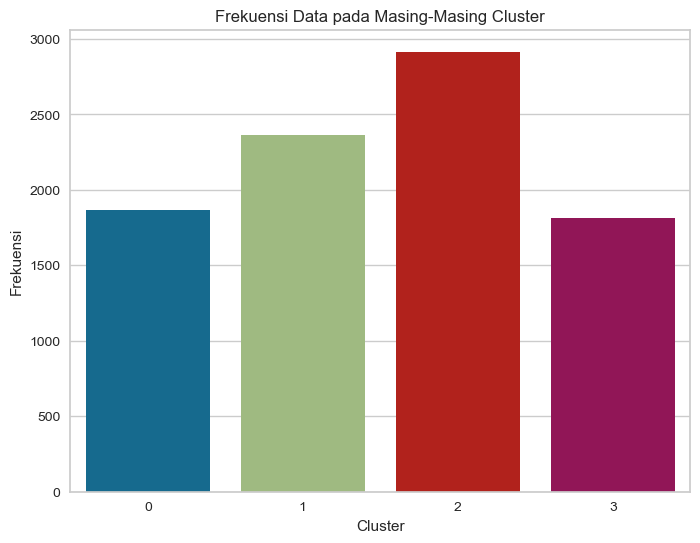

In [73]:
# Nilai untuk sumbu X dan Y
cluster_x1 = df_cluster['Clusters'].value_counts().index
cluster_y1 = df_cluster['Clusters'].value_counts().values

# Visualisasi
sns.barplot(cluster_x1, cluster_y1)
plt.title("Frekuensi Data pada Masing-Masing Cluster")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")

    dari grafik diatas terlihat cluster 2 memiliki frekuensi yang paling tinggi daripada cluster 0, 1, dan 3, sedangkan cluster 3 memiliki frekuensi paling rendah diantara cluster lainnya.

## Kesimpulan

### Kesimpulan Terhadap EDA
* Terdapat 18 atribut yang menjadi kriteria masing-masing customer yang kemudian dipilih 12 atribut yang saling independen (dilihat dari korelasi) untuk pembentukan klaster.
* Berdasarkan jumlah frekuensi, cluster 2 memiliki frekuensi yang paling tinggi daripada cluster 0, 1, dan 3, sedangkan cluster 3 memiliki frekuensi paling rendah diantara cluster lainnya.
* Pola Pengeluaran: Jumlah pembelian secara keseluruhan cenderung tinggi (rata-rata 1.38) di semua kluster. Pembelian dengan satu kali transaksi (one-off purchases) cenderung rendah (rata-rata 0.41). Pembelian dengan angsuran (installments purchases) cenderung rendah (rata-rata 0.19).
* Pola Pembayaran: Jumlah pembayaran cenderung tinggi (rata-rata 0.54) di semua kluster. Pembayaran minimum cenderung tinggi (rata-rata 0.63) di semua kluster. Persentase pembayaran penuh (PRC_FULL_PAYMENT) cenderung rendah (rata-rata 0.22) di semua kluster.
* Saldo Kartu: Saldo kartu cenderung positif (rata-rata 0.28) di semua kluster, menunjukkan kecenderungan penggunaan kartu kredit.
* Penggunaan Kemajuan Tunai: Penggunaan kemajuan tunai (cash advance) cenderung rendah (rata-rata 0.44) di semua kluster. Jumlah transaksi kemajuan tunai (cash advance trx) juga cenderung rendah (rata-rata 0.47) di semua kluster.

### Kesimpulan Terhadap Model
* Cluster digunakan untuk memisahkan kelompok-kelompok data yang berbeda. Berdasarkan hasil diatas, algoritma sudah baik dalam memisahkan kelompok-kelomppoknya, tetapi didalam cluster masih sedikit tercampur dengan cluster lain. Kita dapat melihat beberapa jenis cluster yang berbeda, diantaranya cluster 0, 1, 2, dan 3. Kita mungkin melihat outliers dari beberapa data tersebut.
* Setiap kolom memiliki jumlah data yang sama, yaitu 1864 untuk Klaster 0, 2360 untuk Klaster 1, 2915 untuk Klaster 2, dan 1811 untuk Klaster 3..
* Kluster 0: Saldo tinggi, pembelian dan transaksi tinggi, batas kredit tinggi, pembayaran tinggi.
* Kluster 1: Saldo rendah, pembelian dan transaksi rendah, batas kredit rendah, pembayaran rendah.
* Kluster 2: Saldo sedang, pembelian dan transaksi sedang, batas kredit sedang, pembayaran rendah.
* Kluster 3: Saldo rendah, pembelian dan transaksi rendah, batas kredit rendah, pembayaran tinggi.
* Dalam ringkasan, kluster 0 menunjukkan kebiasaan pengguna yang baik dalam mengelola keuangan, sedangkan kluster 1 menunjukkan kebiasaan yang buruk. Kluster 2 menunjukkan kebiasaan yang sedang, sementara kluster 3 menunjukkan kombinasi saldo rendah dengan pembayaran yang baik.